# 1.Set-up

In [ ]:
!pip install ydata-profiling
!pip install catboost
!pip install xgboost
!pip install -U imbalanced-learn
!pip install -U scikit-learn
!pip install lightgbm
!pip install keras
!pip install tensorflow
!pip install scikit-learn==0.24
!pip install lazypredict

In [ ]:
import pandas as pd
import sys
import ast
#from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import random
#from google.colab import files



from random import shuffle
from sklearn import preprocessing
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split,cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from scipy.stats import norm, skew
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras import models, layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


# Tensforflow libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
%matplotlib inline


warnings.filterwarnings('ignore')

# 2.Data Loading

In [ ]:
data_path = r"E:\data\data_Features (2).csv"
Dataset = pd.read_csv(data_path, error_bad_lines=False)
Dataset

,label,malicious_probability,domain_length,ip,url_length,redirection,digits,letters,path_count,ipv,...,url_count_equal,url_count_http,url_count_https,url_count_www,entropy,is_encoded,unusual_character_count,sus,ratio,tokens
0,1,0.72,0,0,16,0,0,13,0,0,...,0,0,0,0,3.38,0,3,0,0.12,2
1,0,0.97,5,0,35,0,1,29,2,0,...,0,0,0,0,4.08,0,5,0,0.17,2
2,0,0.98,7,0,31,0,1,25,3,0,...,0,0,0,0,3.71,0,5,0,0.19,2
3,1,0.72,9,0,88,0,7,63,1,0,...,4,1,0,1,4.66,0,18,0,0.27,3
4,1,1.00,9,0,235,0,22,199,1,0,...,3,1,0,0,5.49,0,14,0,0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737027,0,0.84,7,0,39,0,12,21,3,0,...,0,0,0,0,4.36,0,6,0,0.46,3
737028,0,0.91,8,0,44,0,7,29,4,0,...,0,0,0,0,4.24,0,8,0,0.30,3
737029,0,0.79,7,0,42,0,3,33,4,0,...,0,0,0,1,4.15,0,6,0,0.21,3
737030,0,0.96,4,0,45,0,0,36,2,0,...,0,0,0,0,4.10,0,9,0,0.20,3


# 3.Data Analysis

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737032 entries, 0 to 737031
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   label                    737032 non-null  int64  
 1   malicious_probability    737032 non-null  float64
 2   domain_length            737032 non-null  int64  
 3   ip                       737032 non-null  int64  
 4   url_length               737032 non-null  int64  
 5   redirection              737032 non-null  int64  
 6   digits                   737032 non-null  int64  
 7   letters                  737032 non-null  int64  
 8   path_count               737032 non-null  int64  
 9   ipv                      737032 non-null  int64  
 10  short                    737032 non-null  int64  
 11  url_count_dash           737032 non-null  int64  
 12  url_count_at             737032 non-null  int64  
 13  url_count_question       737032 non-null  int64  
 14  url_

In [ ]:
Dataset.nunique()

label                           2
malicious_probability        1001
domain_length                 218
ip                              1
url_length                    549
redirection                     2
digits                        222
letters                       425
path_count                     31
ipv                             2
short                           2
url_count_dash                 49
url_count_at                    7
url_count_question             17
url_count_percent             124
url_count_dot                  35
url_count_equal                30
url_count_http                  8
url_count_https                 6
url_count_www                   6
entropy                    227753
is_encoded                      2
unusual_character_count       169
sus                             2
ratio                       10339
tokens                          4
dtype: int64

In [ ]:
Dataset.describe()

,label,malicious_probability,domain_length,ip,url_length,redirection,digits,letters,path_count,ipv,...,url_count_equal,url_count_http,url_count_https,url_count_www,entropy,is_encoded,unusual_character_count,sus,ratio,tokens
count,737032.00,737032.00,737032.00,737032.00,737032.00,737032.00,737032.00,737032.00,737032.00,737032.00,...,737032.00,737032.00,737032.00,737032.00,737032.00,737032.00,737032.00,737032.00,737032.00,737032.00
mean,0.35,0.86,8.48,0.00,60.37,0.00,5.74,45.49,2.37,0.01,...,0.57,0.25,0.02,0.23,4.22,0.04,9.15,0.00,0.20,2.42
std,0.48,0.19,10.96,0.00,48.00,0.06,12.94,33.75,1.60,0.10,...,1.45,0.45,0.15,0.43,0.42,0.19,7.78,0.07,0.12,0.53
min,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.80,4.00,0.00,32.00,0.00,0.00,25.00,1.00,0.00,...,0.00,0.00,0.00,0.00,3.95,0.00,4.00,0.00,0.13,2.00
50%,0.00,0.94,6.00,0.00,46.00,0.00,1.00,36.00,2.00,0.00,...,0.00,0.00,0.00,0.00,4.21,0.00,7.00,0.00,0.17,2.00
75%,1.00,0.99,9.00,0.00,76.00,0.00,6.00,57.00,3.00,0.00,...,0.00,0.00,0.00,0.00,4.49,0.00,11.00,0.00,0.24,3.00
max,1.00,1.00,408.00,0.00,2175.00,1.00,1204.00,2141.00,39.00,1.00,...,51.00,9.00,5.00,5.00,7.50,1.00,372.00,1.00,1.00,3.00


# 4.Feature engineering and data cleaning

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = Dataset.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 737032
Number of columns: 26


### Checking for Null values

In [ ]:
print("Number of NULL values:\n", Dataset.isnull().sum())

Number of NULL values:
 label                      0
malicious_probability      0
domain_length              0
ip                         0
url_length                 0
redirection                0
digits                     0
letters                    0
path_count                 0
ipv                        0
short                      0
url_count_dash             0
url_count_at               0
url_count_question         0
url_count_percent          0
url_count_dot              0
url_count_equal            0
url_count_http             0
url_count_https            0
url_count_www              0
entropy                    0
is_encoded                 0
unusual_character_count    0
sus                        0
ratio                      0
tokens                     0
dtype: int64


### Checking for Duplicate Rows

In [ ]:
print("Number of Duplicate Rows:", Dataset.duplicated().sum())

Number of Duplicate Rows: 160058


In [ ]:
# Dataset.drop_duplicates(inplace=True)
# print("Number of Duplicate Rows after Removal:", Dataset.duplicated().sum())

### Check outliers

In [ ]:
numeric_columns = Dataset.select_dtypes(include=['number'])

# Extract column names
numeric_column_names = numeric_columns.columns.tolist()

# Print the names of numerical columns
print("Numerical Column Names:")
print(numeric_column_names)

Numerical Column Names:
['label', 'malicious_probability', 'domain_length', 'ip', 'url_length', 'redirection', 'digits', 'letters', 'path_count', 'ipv', 'short', 'url_count_dash', 'url_count_at', 'url_count_question', 'url_count_percent', 'url_count_dot', 'url_count_equal', 'url_count_http', 'url_count_https', 'url_count_www', 'entropy', 'is_encoded', 'unusual_character_count', 'sus', 'ratio', 'tokens']


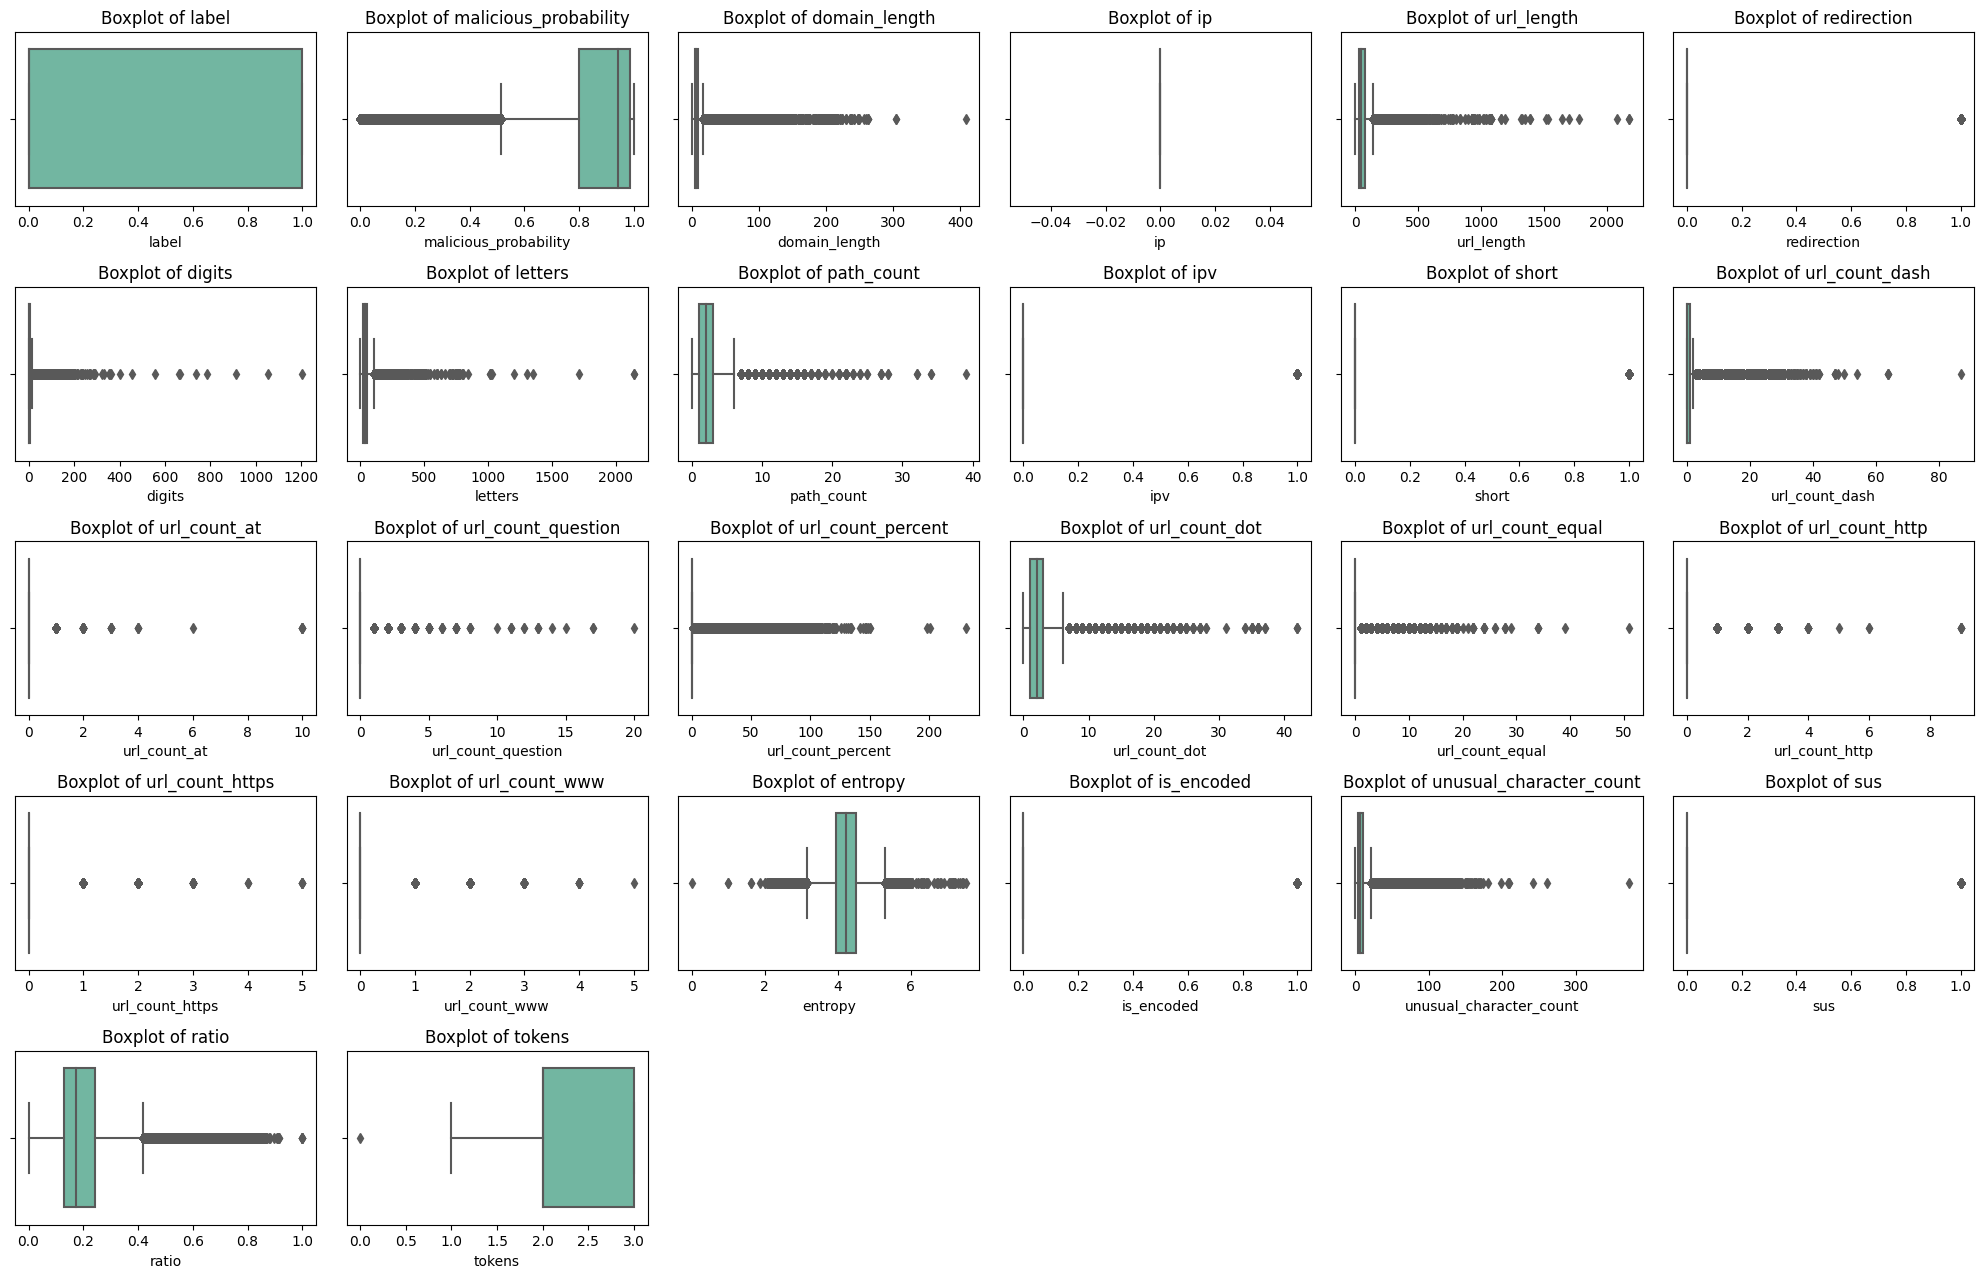

In [ ]:
# Create separate boxplots for each numerical column
plt.figure(figsize=(20, 15))

for i, column in enumerate(numeric_column_names):
    plt.subplot(6, 6, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(x=column, data=Dataset, palette="Set2")
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

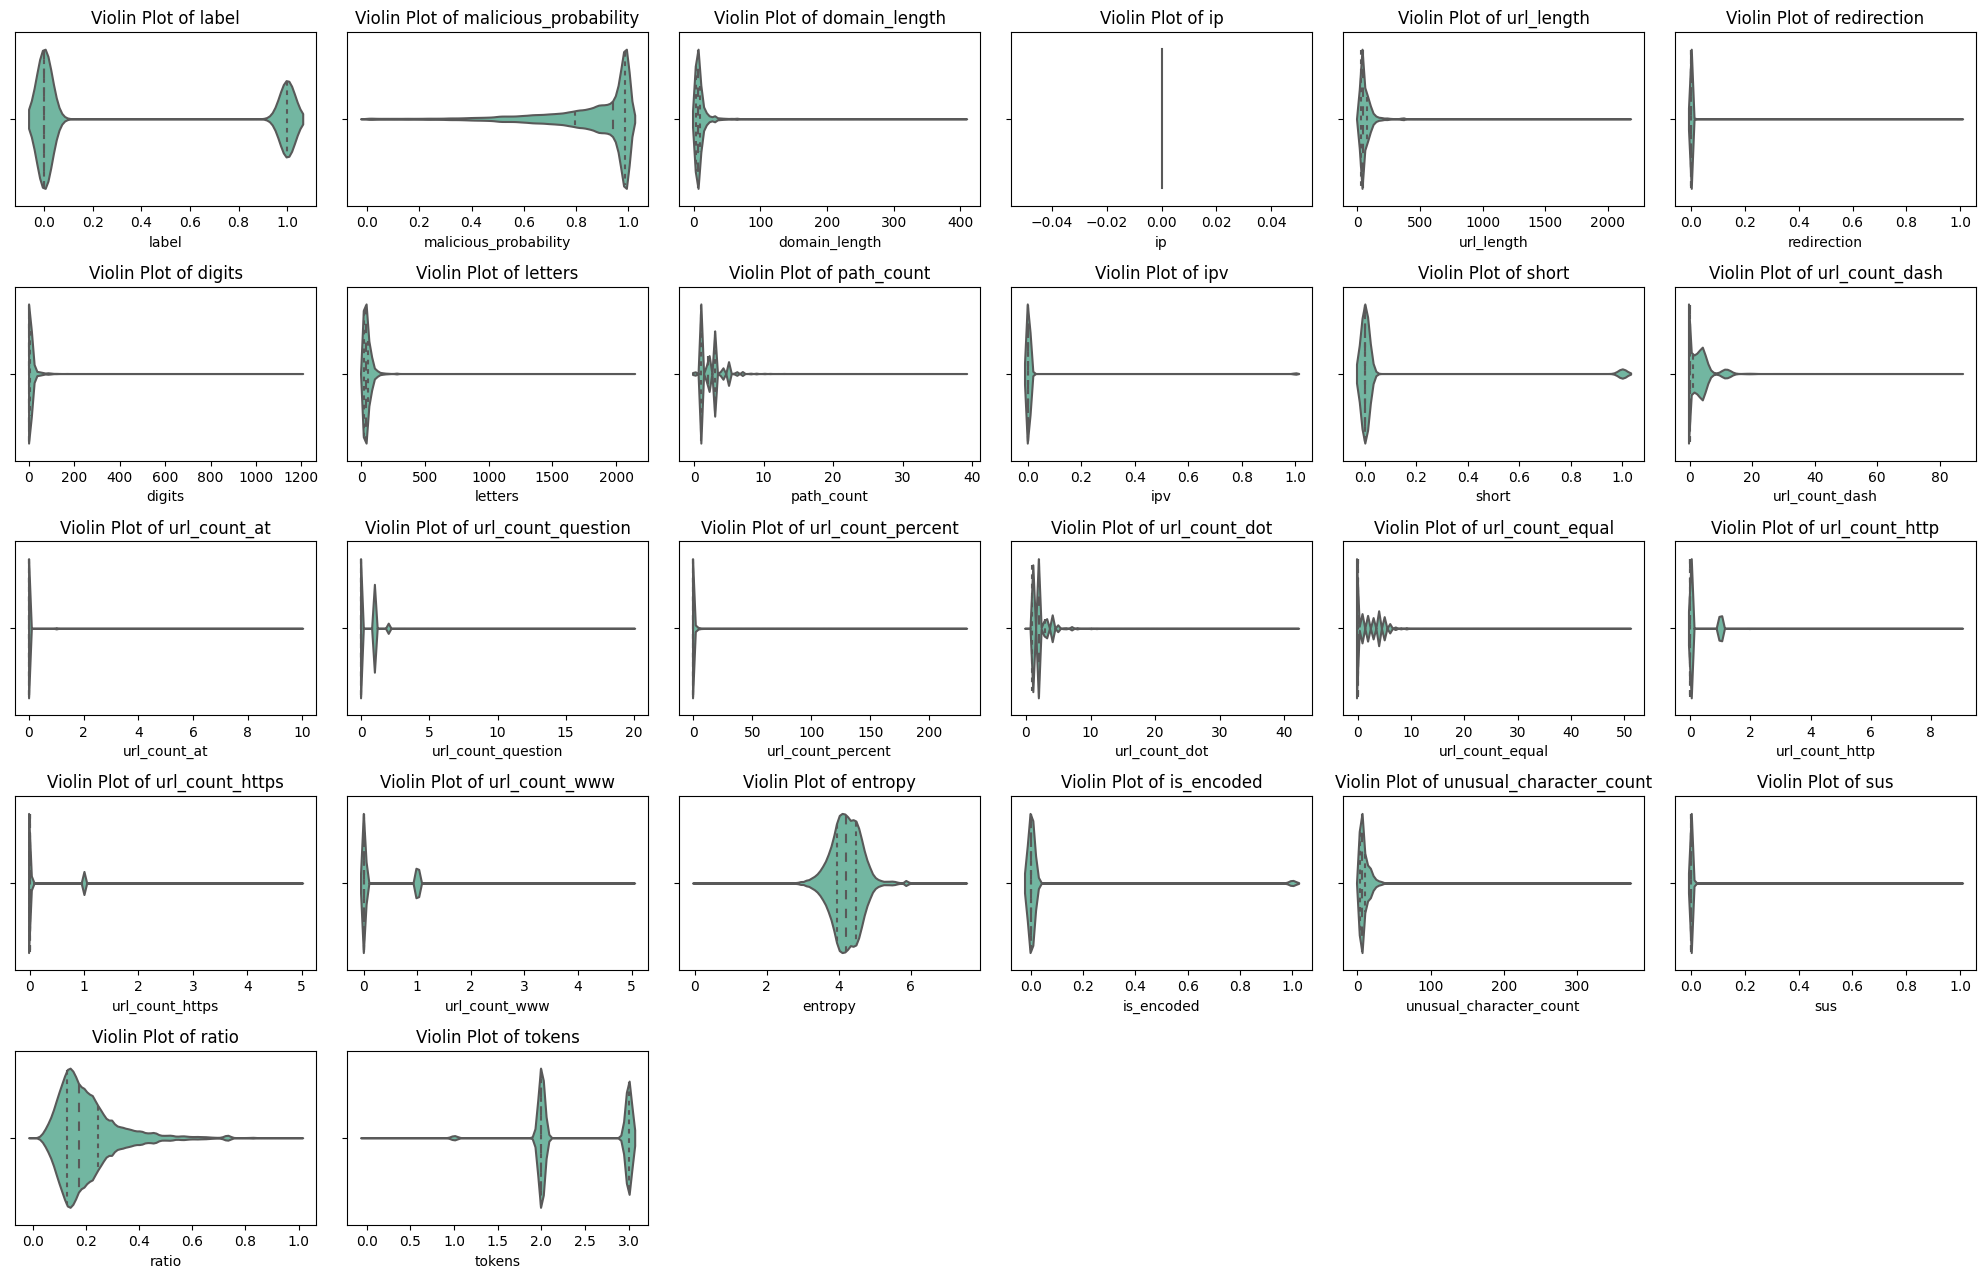

In [ ]:
# Create separate violin plots for each numerical column
plt.figure(figsize=(20, 15))

for i, column in enumerate(numeric_column_names):
    plt.subplot(6, 6, i + 1)  # Adjust the subplot grid as needed
    sns.violinplot(x=column, data=Dataset, palette="Set2", inner="quartile")
    plt.title(f"Violin Plot of {column}")

plt.tight_layout()
plt.show()

## EDA

### Distribution graphs (Histograms)

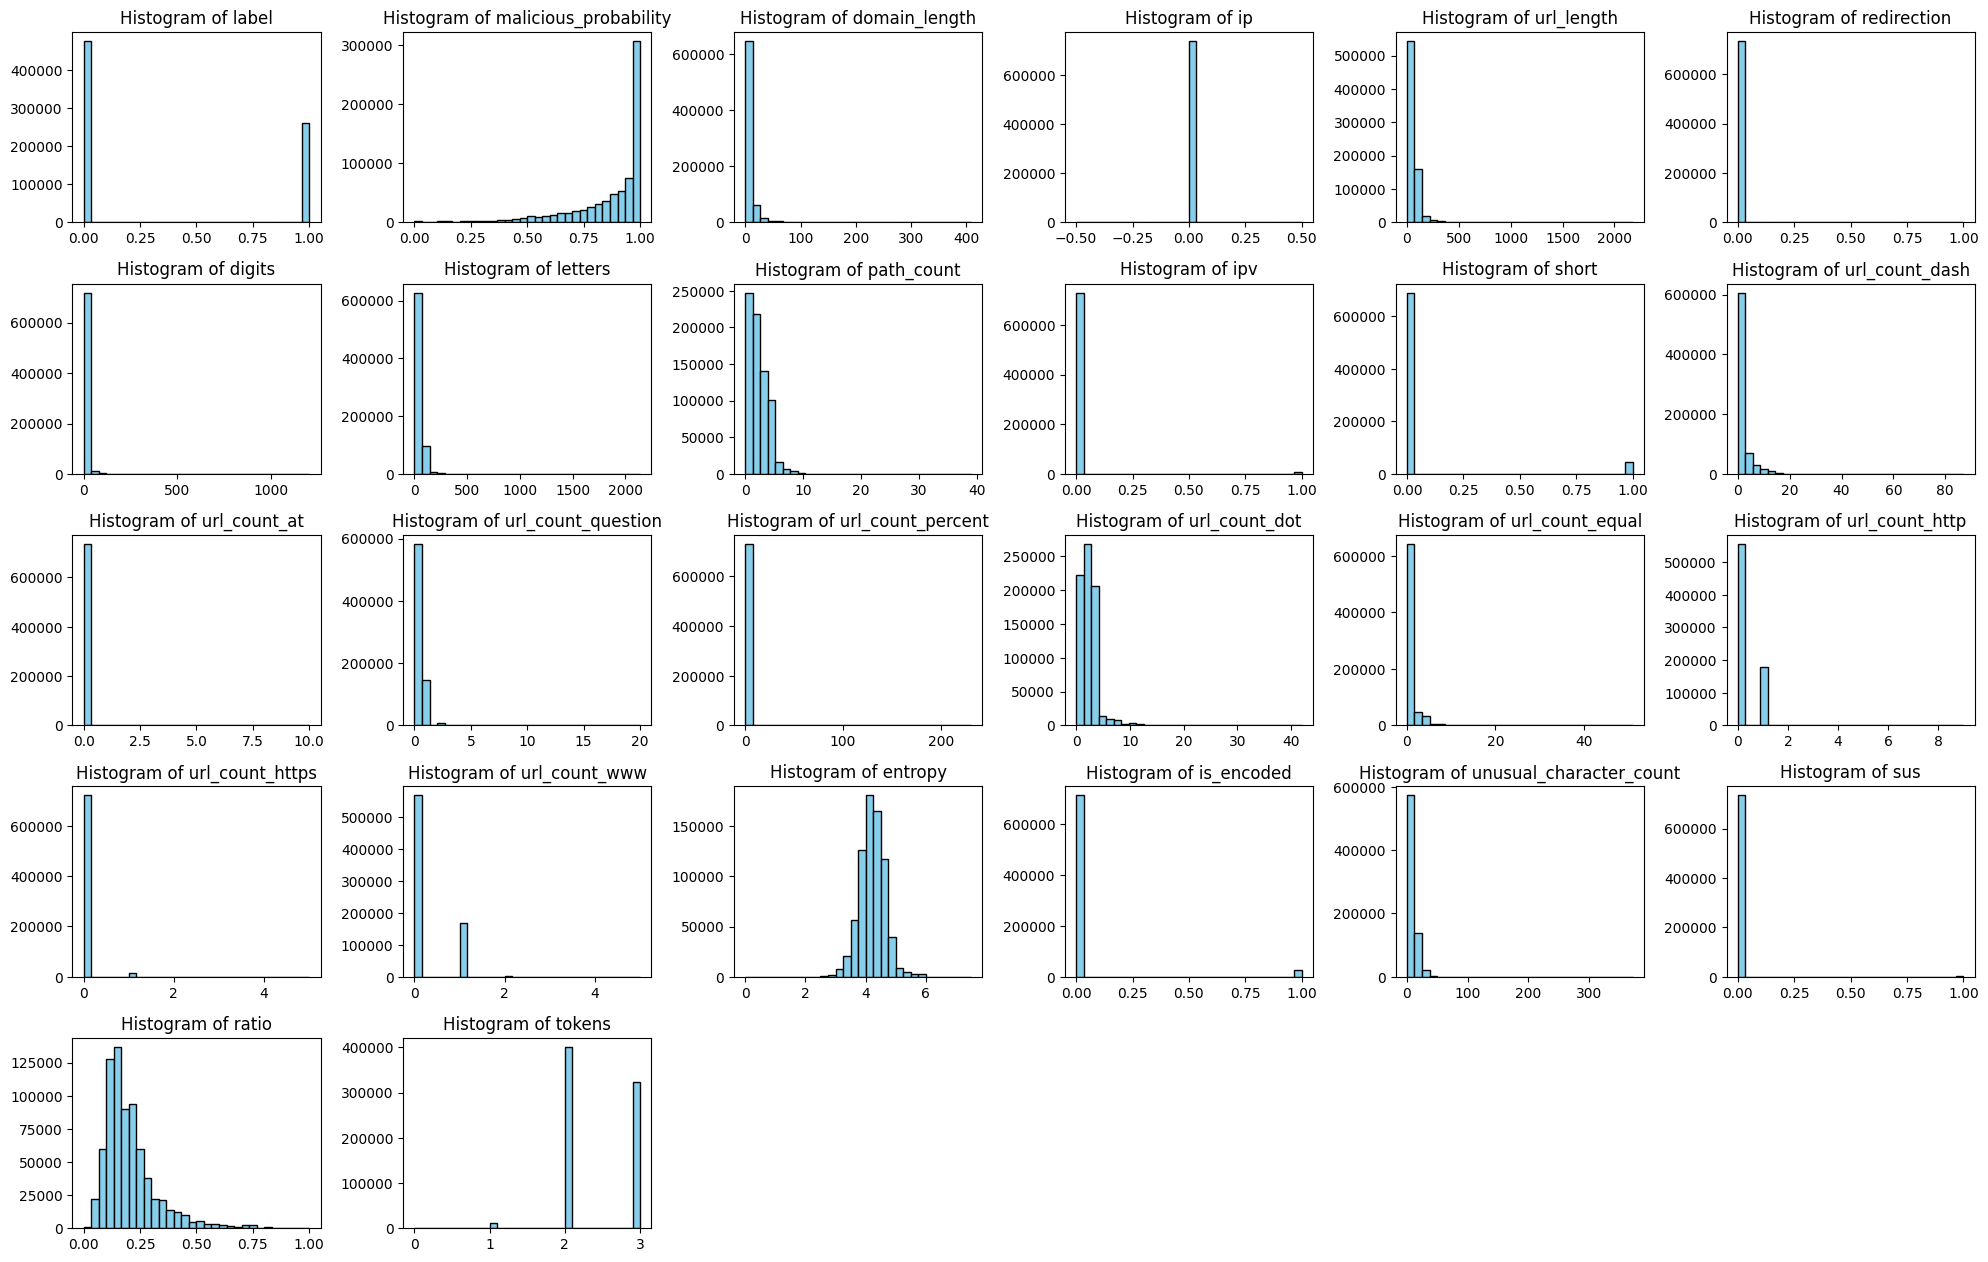

In [ ]:
# Create separate histograms for each numerical column
plt.figure(figsize=(20, 15))

for i, column in enumerate(numeric_column_names):
    plt.subplot(6, 6, i + 1)  # Adjust the subplot grid as needed
    plt.hist(Dataset[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {column}")

plt.tight_layout()
plt.show()

### Correlation matrix

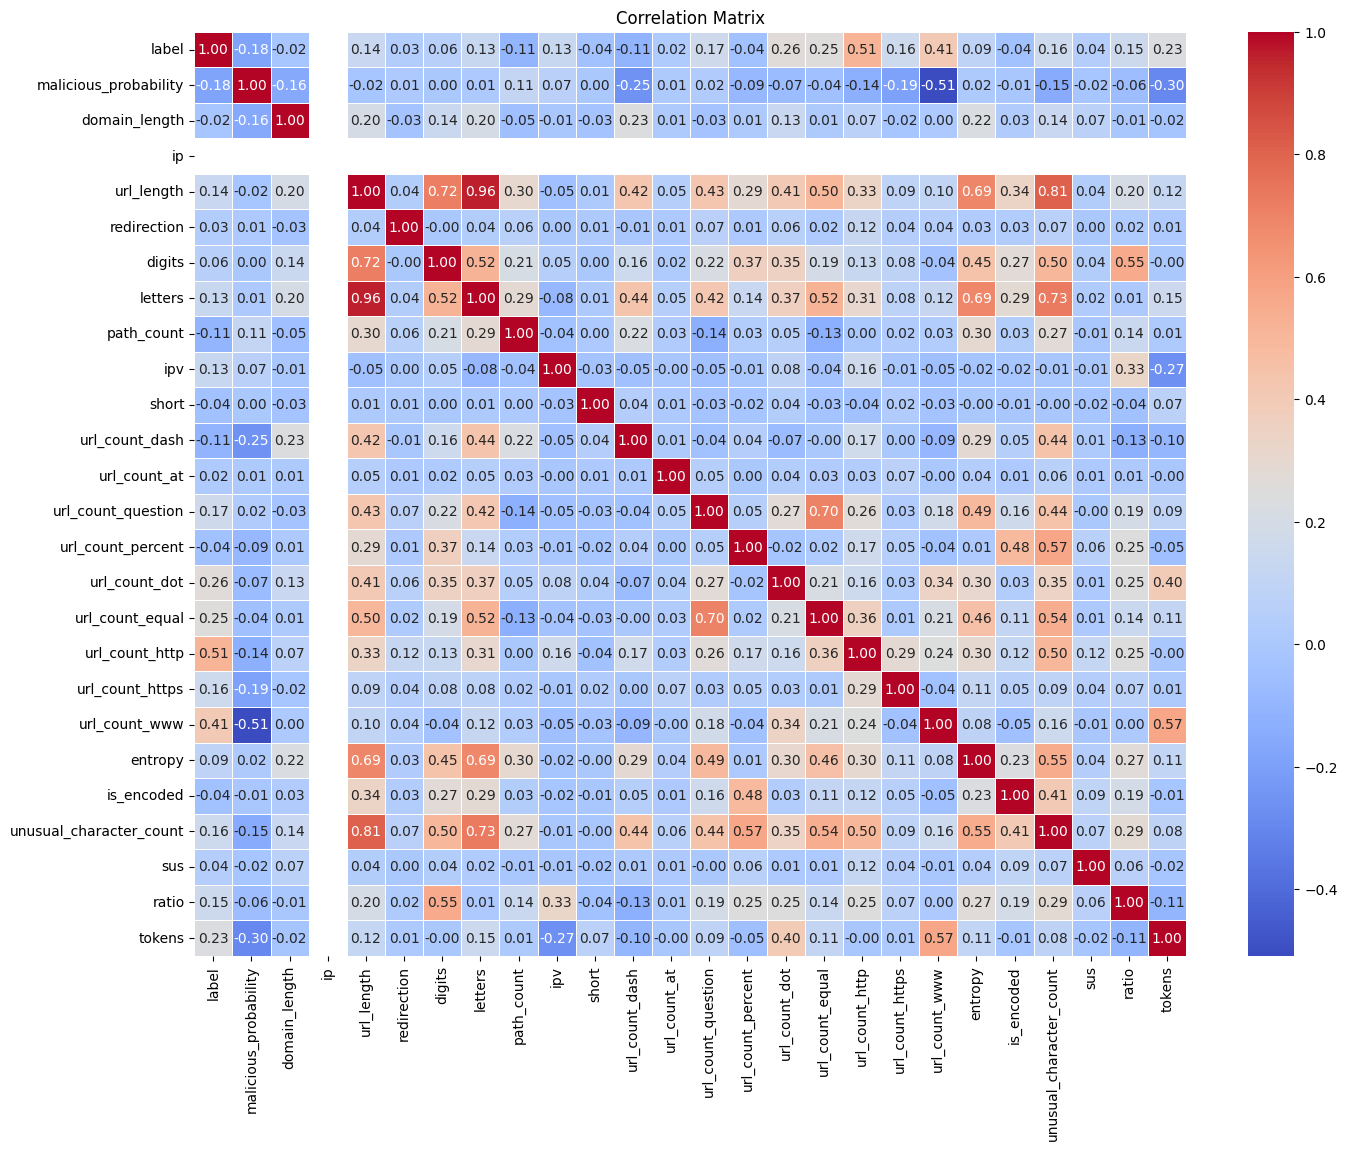

In [ ]:
# Selecting only numerical columns
numeric_columns = Dataset[numeric_column_names]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

### Balance or Non-Balance?
Number of Phihing(Attack) and Benign(Not-Attack)

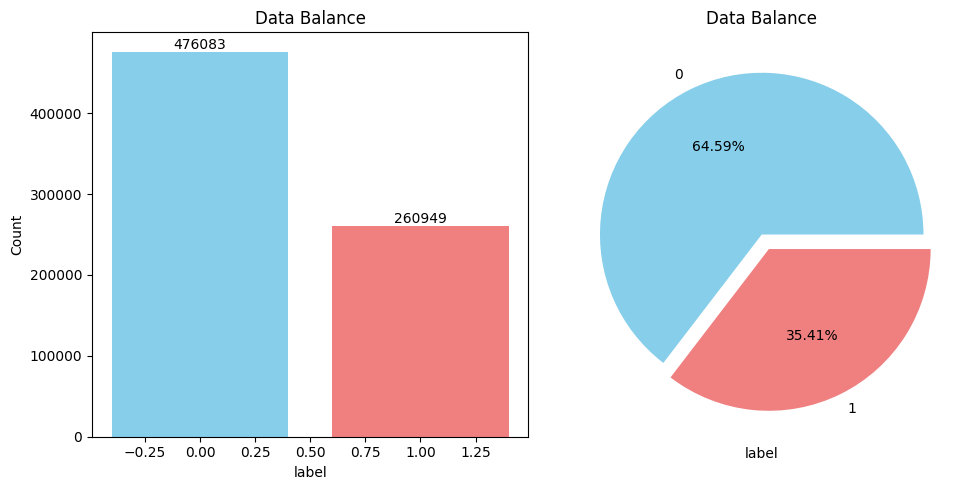

In [ ]:
# Assuming S_dataset is your DataFrame
attack_counts = Dataset['label'].value_counts()

# Create a figure and a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Bar plot on the first subplot
bars = axes[0].bar(attack_counts.index, attack_counts.values, color=['skyblue', 'lightcoral'])
axes[0].set_xlabel('label')
axes[0].set_ylabel('Count')
axes[0].set_title('Data Balance')

# Add count labels on top of each bar
for bar, count in zip(bars, attack_counts.values):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom')

# Pie chart on the second subplot
Dataset['label'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', colors=['skyblue', 'lightcoral'], ax=axes[1])
axes[1].set_xlabel('label')
axes[1].set_ylabel('')  # Remove y-axis label for pie chart
axes[1].set_title('Data Balance')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Extract features (X) and target variable (y)
X = Dataset.drop(columns=['label'])  # X includes all columns except 'Type'
y = Dataset['label']  # Target variable is 'Type'


### Identifying Features with Overwhelmingly Repeated Maximum Values

In [ ]:
def identify_repeated_max(df):
    cols_to_drop = []  # Initialize a list to store column names to be dropped

    cols = df.columns.values
    for col in cols:
        max_count = df[col].value_counts().max()
        total = len(df)
        max_percentage = (max_count / total) * 100

        if max_percentage > 90:  # Check if repetition percentage is over 97%
            print(f"Feature '{col}' has the largest value repeated more than 70% of the time.")
            print(f"Largest value: {df[col].value_counts().idxmax()}")
            print(f"Repetition percentage: {max_percentage:.2f}%")
            print()
            cols_to_drop.append(col)  # Add the column to the list of columns to be dropped

    return cols_to_drop  # Return the list of column names to be dropped

In [ ]:
# Call the function and get the list of columns to be dropped
columns_to_drop = identify_repeated_max(X)

print("Columns to be dropped:", columns_to_drop)

Feature 'ip' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 100.00%

Feature 'redirection' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 99.62%

Feature 'ipv' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 99.01%

Feature 'short' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 93.71%

Feature 'url_count_at' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 99.79%

Feature 'url_count_percent' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 96.38%

Feature 'url_count_https' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 97.72%

Feature 'is_encoded' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percenta

In [ ]:
cols_to_drop = identify_repeated_max(X)

X1 = X.drop(cols_to_drop, axis=1)

Feature 'ip' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 100.00%

Feature 'redirection' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 99.62%

Feature 'ipv' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 99.01%

Feature 'short' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 93.71%

Feature 'url_count_at' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 99.79%

Feature 'url_count_percent' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 96.38%

Feature 'url_count_https' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percentage: 97.72%

Feature 'is_encoded' has the largest value repeated more than 70% of the time.
Largest value: 0
Repetition percenta

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = X1.shape

# Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 737032
Number of columns: 16


### OverSampling
to make the data balance

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Now, X_train_resampled and y_train_resampled contain the resampled data with synthetic samples for the minority class


In [ ]:
y_train_resampled

0         0
1         0
2         0
3         0
4         0
         ..
761367    1
761368    1
761369    1
761370    1
761371    1
Name: label, Length: 761372, dtype: int64

### Balance or Non-Balance?
Number of Phihing(Attack) and Benign(Not-Attack)

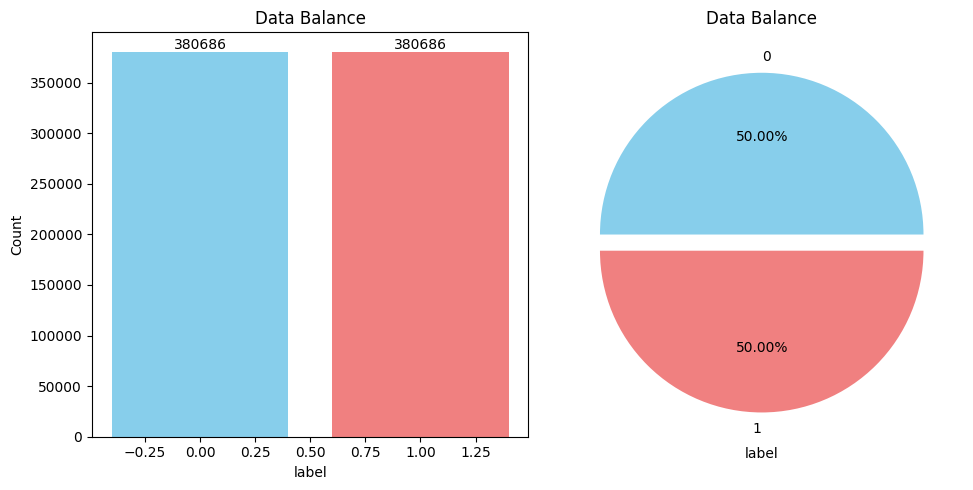

In [ ]:
# Assuming S_dataset is your DataFrame
attack_counts = y_train_resampled.value_counts()

# Create a figure and a 1x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Bar plot on the first subplot
bars = axes[0].bar(attack_counts.index, attack_counts.values, color=['skyblue', 'lightcoral'])
axes[0].set_xlabel('label')
axes[0].set_ylabel('Count')
axes[0].set_title('Data Balance')

# Add count labels on top of each bar
for bar, count in zip(bars, attack_counts.values):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom')

# Pie chart on the second subplot
y_train_resampled.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%%', colors=['skyblue', 'lightcoral'], ax=axes[1])
axes[1].set_xlabel('label')
axes[1].set_ylabel('')  # Remove y-axis label for pie chart
axes[1].set_title('Data Balance')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
print("Number of Duplicate Rows:", Dataset.duplicated().sum())

Number of Duplicate Rows: 160058


# 5.Modeling

### Apply LazyClassifier

In [ ]:
# Initialize LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.86,0.87,0.87,0.87,5.09
XGBClassifier,0.86,0.87,0.87,0.86,37.95
SVC,0.86,0.87,0.87,0.87,25362.20
AdaBoostClassifier,0.85,0.84,0.84,0.85,31.99
NuSVC,0.83,0.83,0.83,0.83,45207.52
KNeighborsClassifier,0.81,0.81,0.81,0.82,1609.17
LogisticRegression,0.82,0.80,0.80,0.82,2.41
CalibratedClassifierCV,0.82,0.80,0.80,0.82,769.51
LinearSVC,0.82,0.80,0.80,0.82,198.22


## Classfication Models

In [ ]:
def bias_variance(clf, x_train, x_test, y_train, y_test):
 #label_encoder object knows how to understand word labels.
        label_encoder = preprocessing.LabelEncoder()
        X_train_copy = np.copy(x_train)
        X_test_copy = np.copy(x_test)
        y_train_copy = np.copy(y_train)
        y_test_copy = np.copy(y_test)

        # Predict the labels for training and test data
        y_train_pred = clf.predict(x_train)
        y_test_pred = clf.predict(x_test)

        # Encode the true and predicted labels
        y_train_encoded = label_encoder.fit_transform(y_train_copy)
        y_test_encoded = label_encoder.fit_transform(y_test_copy)
        y_train_pred_encoded = label_encoder.transform(y_train_pred)
        y_test_pred_encoded = label_encoder.transform(y_test_pred)

        # Calculate the average bias
        avg_bias = np.mean((y_train_encoded - y_train_pred_encoded) ** 2)

        # Calculate the average variance
        avg_var = np.mean(np.var(y_train_pred_encoded, axis=0))

        print('Average bias: %.3f' % avg_bias)
        print('Average variance: %.3f' % avg_var)

In [ ]:
pastel_palette = sns.color_palette('pastel')
model_results = {}
classifiers_scores = {}

def bias_variance(clf, X_train, X_test, y_train, y_test):
    # Implementation of bias-variance decomposition is needed here
    pass

def Classifiers(X_train, y_train, X_test, y_test):
    val_results = {}
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        #"Support Vector Machine SVM": SVC(C=100, gamma=0.002),
        #"Support Vector Machine SVM (RBF)": SVC(C=100, gamma=0.002, kernel='rbf'),
        "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
        "XGB Extreme X Gradient Boosting": XGBClassifier(use_label_encoder=False),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
        "Catboost": CatBoostClassifier(iterations=50, random_state=42),
        "LGBM": LGBMClassifier(random_state=42),
        "Stochastic Gradient Descent SGD": SGDClassifier(loss='modified_huber', random_state=42),
        "Gaussian Naive Bayes": GaussianNB(),
        "Bernoulli Naive Bayes": BernoulliNB(),
        "Extra Trees Classifier": ExtraTreesClassifier(n_estimators=100, random_state=42),
        "Extra Tree Classifier": ExtraTreeClassifier(random_state=42),
        "Bagging Classifier": BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42),
        "K Nearest Neighbors": KNeighborsClassifier(),
    }

    # Shuffle the data to ensure randomness in cross-validation
    # X_train, y_train = shuffle(X_train, y_train, random_state=42)
    f1_scores={}
    clf_models = {}  # Dictionary to store trained models

    for clf_name, clf in classifiers.items():
        print(f"{clf_name}")
        print("------------------------------------------------------------------------------------------------------")

        val_accuracy = cross_val_score(clf, X_train, y_train, cv=10)
        val_results[clf_name] = val_accuracy
        print("Cross_validation Accuracy for", clf_name, ":\n", val_results[clf_name])
        print("------------------------------------------------------------------------------------------------------")

        clf_model = clf.fit(X_train, y_train)
        clf_models[clf_name] = clf_model  # Store the trained model
        y_test_pred = clf_model.predict(X_test)
        y_train_pred = clf_model.predict(X_train)

        # Calculate Average bias, Average variance
        bias_variance(clf, X_train, X_test, y_train, y_test)
        print("------------------------------------------------------------------------------------------------------")

        ##############################################################################################################
        # Confusion Matrix for Training and Testing
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)

        # Visualize the confusion matrices using Seaborn
        fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

        sns.heatmap(cm_train, annot=True, cmap='Pastel2', ax=axs[0], fmt='g')
        axs[0].set_title(f"{clf_name} Training Confusion Matrix")
        axs[0].set_xlabel('Predicted Labels')
        axs[0].set_ylabel('Actual Labels')

        sns.heatmap(cm_test, annot=True, cmap='Pastel1', ax=axs[1], fmt='g')
        axs[1].set_title(f"{clf_name} Testing Confusion Matrix")
        axs[1].set_xlabel('Predicted Labels')
        axs[1].set_ylabel('Actual Labels')

        plt.tight_layout()
        plt.show()
        print("------------------------------------------------------------------------------------------------------")

        ##############################################################################################################
        # F1 Score for Training and Testing
        Train_F1 = f1_score(y_train, y_train_pred)
        Test_F1 = f1_score(y_test, y_test_pred)
        f1_scores[clf_name]=Test_F1

        model_results[clf_name] = Test_F1

        print("Train F1 Score is:", Train_F1)
        print("Test F1 Score is:", Test_F1)
        print("------------------------------------------------------------------------------------------------------")

        ##############################################################################################################
        # Classification Report for Training and Testing
        clf_report_Train = classification_report(y_train, y_train_pred)
        print(f"{clf_name} Training Classification Report:\n{clf_report_Train}")
        print("------------------------------------------------------------------------------------------------------")

        clf_report_Test = classification_report(y_test, y_test_pred)
        print(f"{clf_name} Testing Classification Report:\n{clf_report_Test}")
        print("------------------------------------------------------------------------------------------------------")

        ##############################################################################################################
        # Performance Metrics for Training and Testing
        acc_train = accuracy_score(y_train, y_train_pred)
        pre_train = precision_score(y_train, y_train_pred)
        recall_train = recall_score(y_train, y_train_pred)
        f1_train = f1_score(y_train, y_train_pred)

        # Create DataFrame for training metrics
        metrics_train = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 score'],
                                      'Value': [acc_train, pre_train, recall_train, f1_train]})

        acc_test = accuracy_score(y_test, y_test_pred)
        pre_test = precision_score(y_test, y_test_pred)
        recall_test = recall_score(y_test, y_test_pred)
        f1_test = f1_score(y_test, y_test_pred)

        # Create DataFrame for testing metrics
        metrics_test = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 score'],
                                     'Value': [acc_test, pre_test, recall_test, f1_test]})

        classifiers_scores[clf_name] = [acc_test, pre_test, recall_test, f1_test]

        fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

        sns.barplot(x='Metric', y='Value', data=metrics_train, ax=axs[0], palette=pastel_palette)
        axs[0].set_title(f"{clf_name} Training Performance Metrics")

        sns.barplot(x='Metric', y='Value', data=metrics_test, ax=axs[1], palette=pastel_palette)
        axs[1].set_title(f"{clf_name} Testing Performance Metrics")

        plt.tight_layout()
        plt.show()

        #####################


   # Return all classifiers along with their F1 scores
    return clf_models, classifiers

Logistic Regression
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for Logistic Regression :
 [0.79795897 0.80325199 0.794305   0.80247449 0.79538201 0.7986787
 0.79634081 0.79719453 0.7981796  0.80265837]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


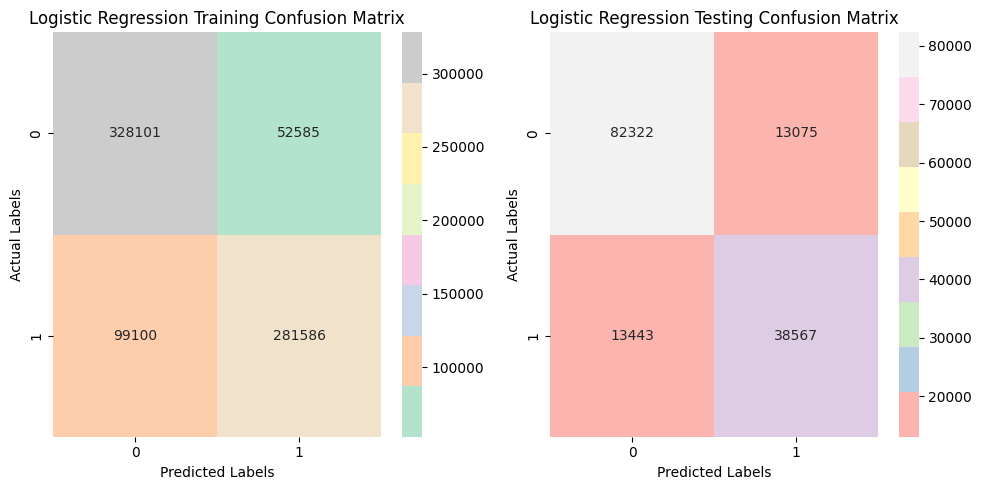

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.7878107089949458
Test F1 Score is: 0.7441631613475861
------------------------------------------------------------------------------------------------------
Logistic Regression Training Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81    380686
           1       0.84      0.74      0.79    380686

    accuracy                           0.80    761372
   macro avg       0.81      0.80      0.80    761372
weighted avg       0.81      0.80      0.80    761372

------------------------------------------------------------------------------------------------------
Logistic Regression Testing Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     95397
           1       0.75      0.74      0.74     52010

    accuracy          

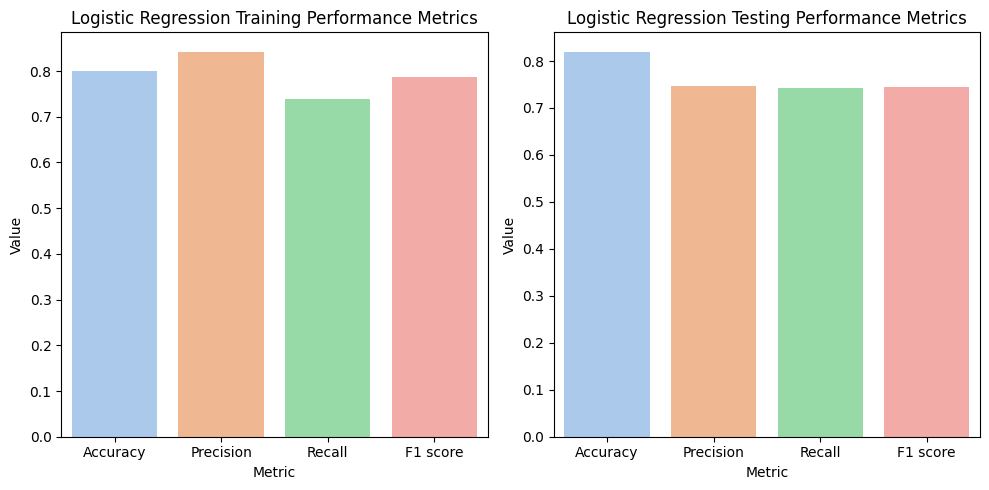

Decision Tree Classifier
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for Decision Tree Classifier :
 [0.76077648 0.76336389 0.76023484 0.7621393  0.76279601 0.7946859
 0.82498654 0.82272745 0.82408028 0.82520982]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


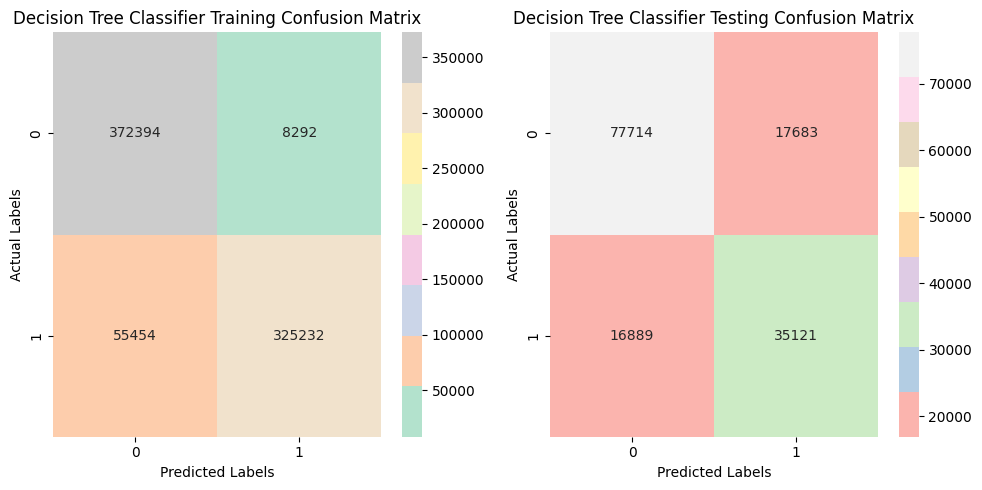

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.9107461390907435
Test F1 Score is: 0.6701585666036979
------------------------------------------------------------------------------------------------------
Decision Tree Classifier Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    380686
           1       0.98      0.85      0.91    380686

    accuracy                           0.92    761372
   macro avg       0.92      0.92      0.92    761372
weighted avg       0.92      0.92      0.92    761372

------------------------------------------------------------------------------------------------------
Decision Tree Classifier Testing Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     95397
           1       0.67      0.68      0.67     52010

    accuracy

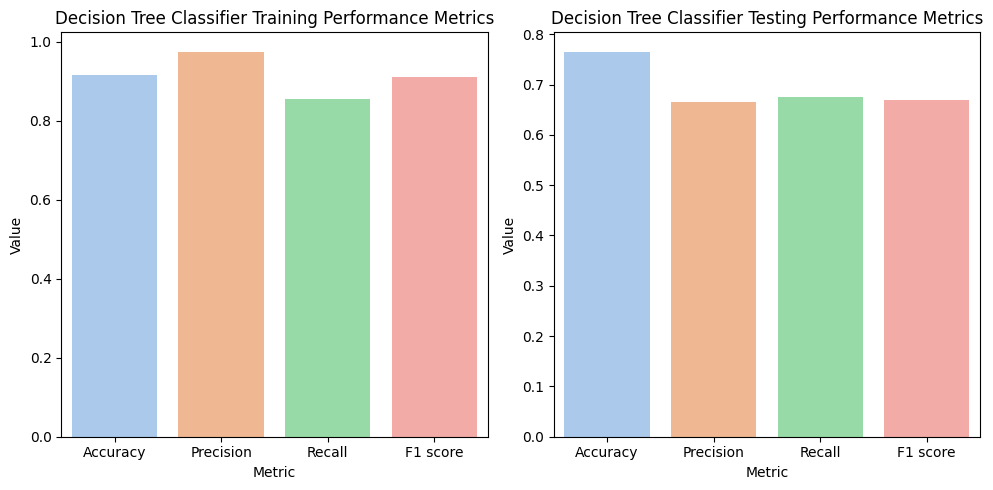

Random Forest
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for Random Forest :
 [0.77197983 0.77602511 0.77212131 0.77235772 0.7739207  0.82017941
 0.86726559 0.86680589 0.86805364 0.86814558]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


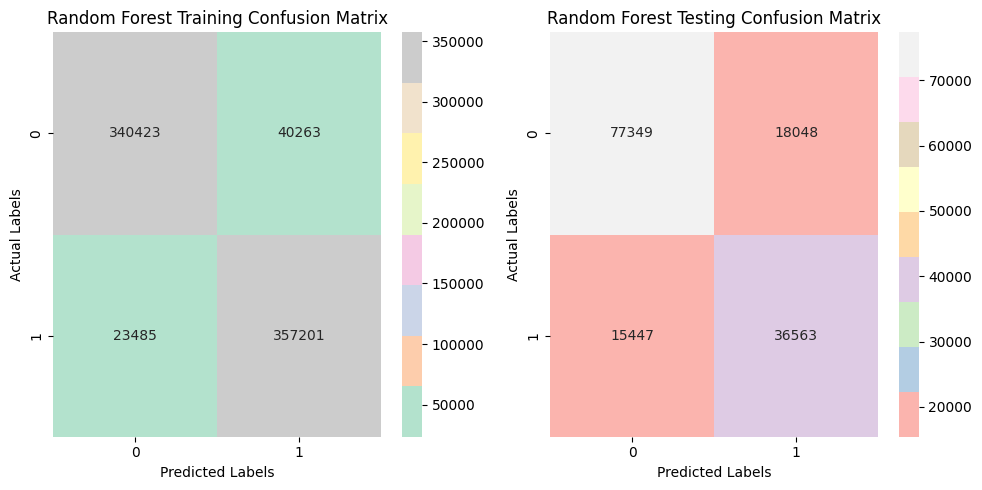

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.9180774914862173
Test F1 Score is: 0.6858498794796521
------------------------------------------------------------------------------------------------------
Random Forest Training Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91    380686
           1       0.90      0.94      0.92    380686

    accuracy                           0.92    761372
   macro avg       0.92      0.92      0.92    761372
weighted avg       0.92      0.92      0.92    761372

------------------------------------------------------------------------------------------------------
Random Forest Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     95397
           1       0.67      0.70      0.69     52010

    accuracy                      

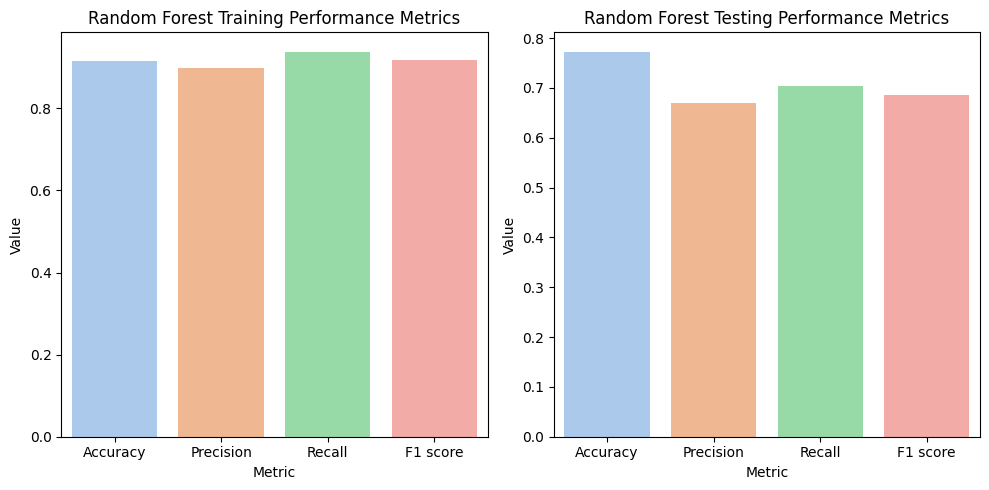

AdaBoost
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for AdaBoost :
 [0.83800468 0.84128819 0.83911896 0.83918463 0.84013029 0.83344497
 0.82981993 0.82996441 0.83408855 0.83256498]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


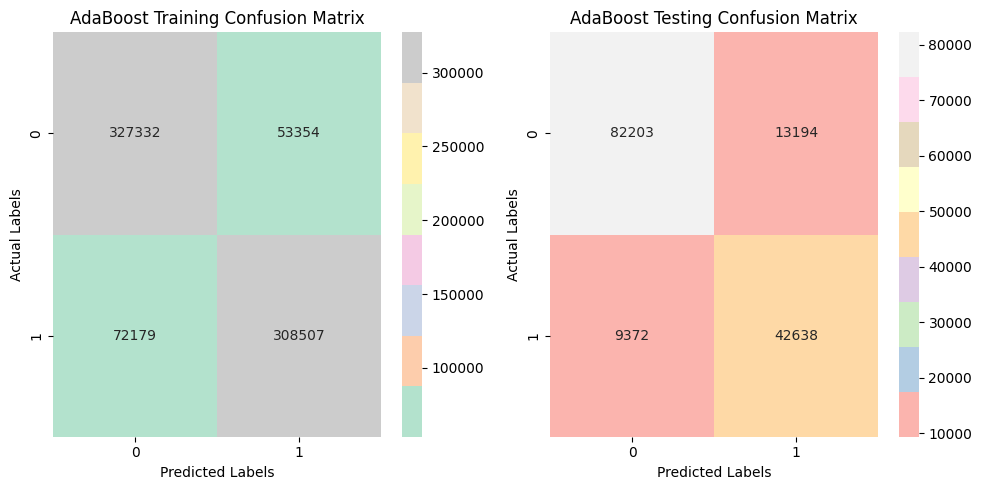

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.830942687802927
Test F1 Score is: 0.7907494297212588
------------------------------------------------------------------------------------------------------
AdaBoost Training Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84    380686
           1       0.85      0.81      0.83    380686

    accuracy                           0.84    761372
   macro avg       0.84      0.84      0.84    761372
weighted avg       0.84      0.84      0.84    761372

------------------------------------------------------------------------------------------------------
AdaBoost Testing Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     95397
           1       0.76      0.82      0.79     52010

    accuracy                           0.85  

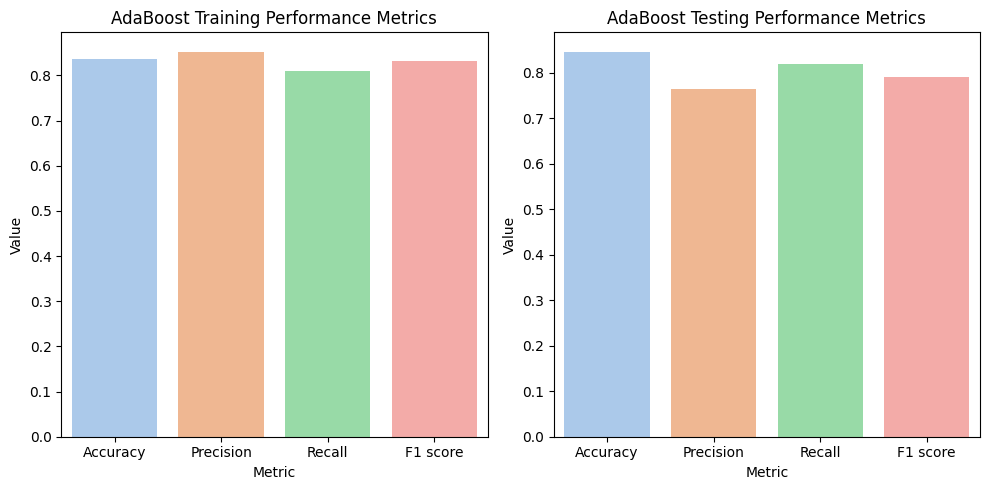

XGB Extreme X Gradient Boosting
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for XGB Extreme X Gradient Boosting :
 [0.86410203 0.86693898 0.86469128 0.86601784 0.86490143 0.87456821
 0.88451082 0.88566663 0.88640214 0.88587677]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


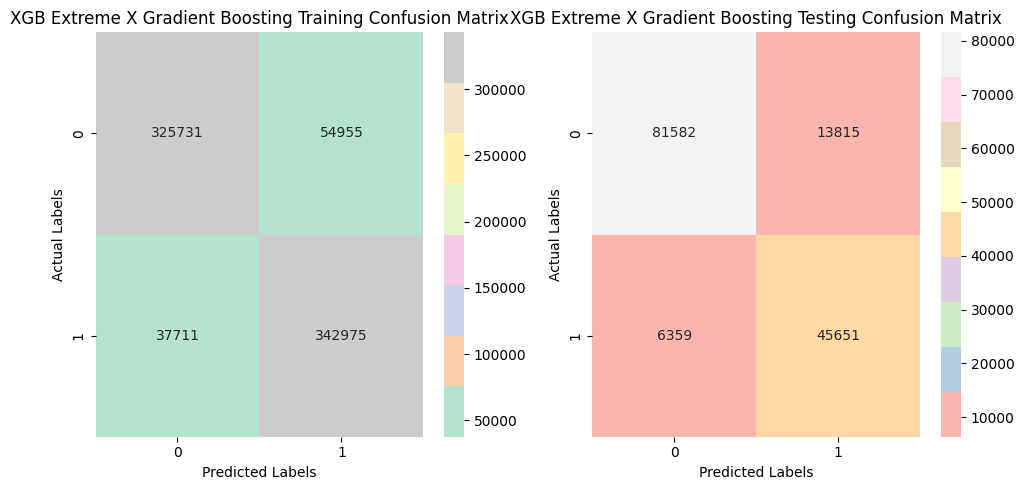

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.8809862628047714
Test F1 Score is: 0.8190283110265887
------------------------------------------------------------------------------------------------------
XGB Extreme X Gradient Boosting Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88    380686
           1       0.86      0.90      0.88    380686

    accuracy                           0.88    761372
   macro avg       0.88      0.88      0.88    761372
weighted avg       0.88      0.88      0.88    761372

------------------------------------------------------------------------------------------------------
XGB Extreme X Gradient Boosting Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89     95397
           1       0.77      0.88      0.82     52010

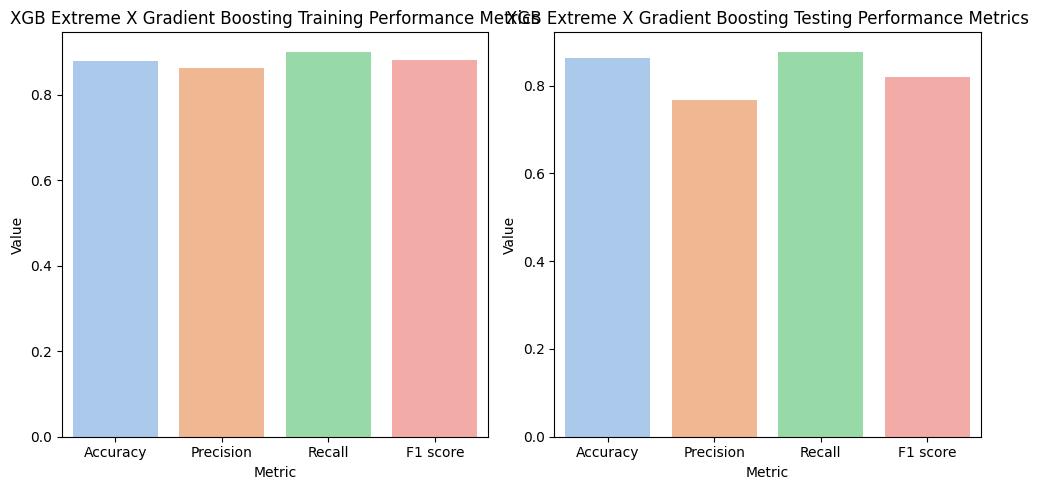

Gradient Boosting
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for Gradient Boosting :
 [0.85159841 0.85329271 0.8531463  0.85599643 0.85287048 0.84942932
 0.84475354 0.84640845 0.84799769 0.84650039]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


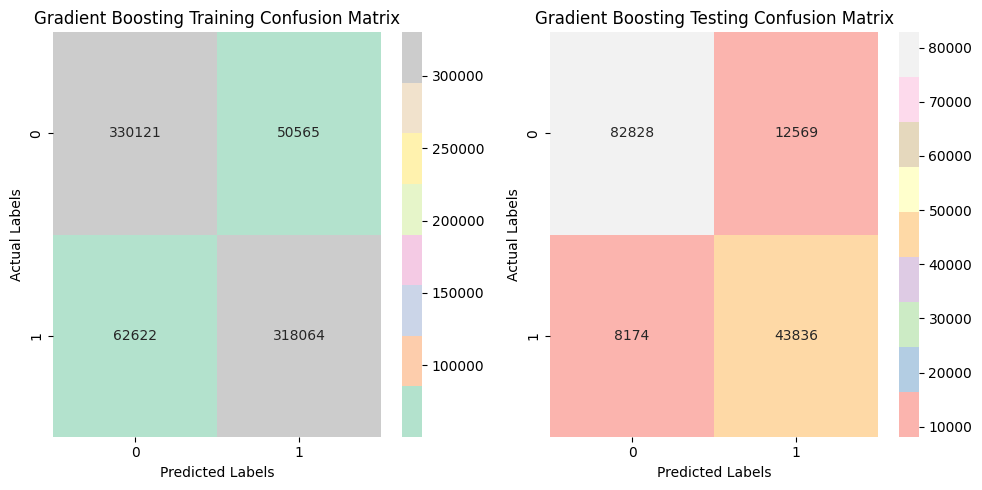

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.8489460373808079
Test F1 Score is: 0.8086703869390767
------------------------------------------------------------------------------------------------------
Gradient Boosting Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85    380686
           1       0.86      0.84      0.85    380686

    accuracy                           0.85    761372
   macro avg       0.85      0.85      0.85    761372
weighted avg       0.85      0.85      0.85    761372

------------------------------------------------------------------------------------------------------
Gradient Boosting Testing Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     95397
           1       0.78      0.84      0.81     52010

    accuracy              

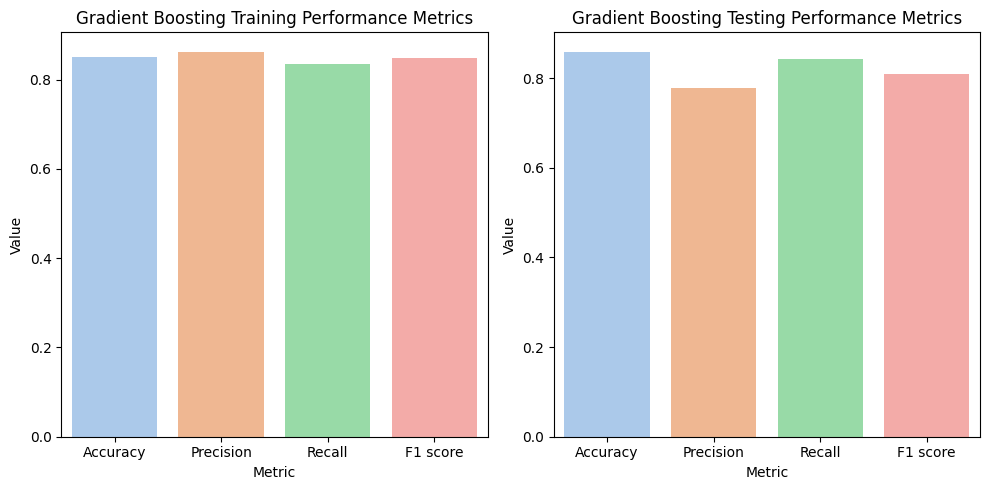

Catboost
------------------------------------------------------------------------------------------------------
Learning rate set to 0.5
0:	learn: 0.4017164	total: 178ms	remaining: 8.73s
1:	learn: 0.3554772	total: 218ms	remaining: 5.22s
2:	learn: 0.3378262	total: 256ms	remaining: 4s
3:	learn: 0.3303825	total: 296ms	remaining: 3.4s
4:	learn: 0.3238133	total: 332ms	remaining: 2.99s
5:	learn: 0.3205669	total: 370ms	remaining: 2.72s
6:	learn: 0.3166293	total: 410ms	remaining: 2.52s
7:	learn: 0.3122796	total: 449ms	remaining: 2.36s
8:	learn: 0.3093671	total: 489ms	remaining: 2.23s
9:	learn: 0.3066017	total: 527ms	remaining: 2.11s
10:	learn: 0.3050706	total: 563ms	remaining: 2s
11:	learn: 0.3027393	total: 606ms	remaining: 1.92s
12:	learn: 0.3018826	total: 642ms	remaining: 1.83s
13:	learn: 0.3008212	total: 680ms	remaining: 1.75s
14:	learn: 0.2990846	total: 716ms	remaining: 1.67s
15:	learn: 0.2973128	total: 757ms	remaining: 1.61s
16:	learn: 0.2961981	total: 795ms	remaining: 1.54s
17:	learn: 0.

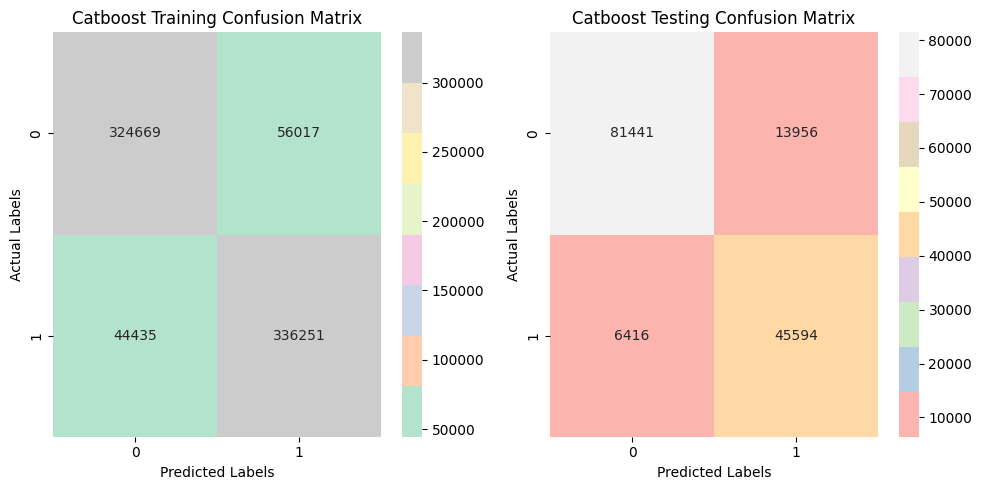

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.870041425492332
Test F1 Score is: 0.817389745428469
------------------------------------------------------------------------------------------------------
Catboost Training Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87    380686
           1       0.86      0.88      0.87    380686

    accuracy                           0.87    761372
   macro avg       0.87      0.87      0.87    761372
weighted avg       0.87      0.87      0.87    761372

------------------------------------------------------------------------------------------------------
Catboost Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89     95397
           1       0.77      0.88      0.82     52010

    accuracy                           0.86   

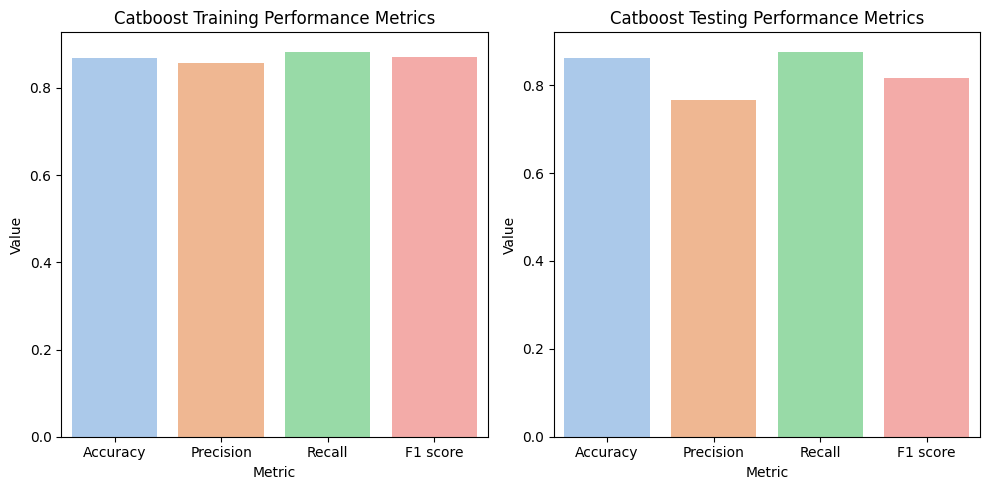

LGBM
------------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 342617, number of negative: 342617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1952
[LightGBM] [Info] Number of data points in the train set: 685234, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 342617, number of negative: 342617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1954
[LightGBM] [Info] Number of data points in the train 

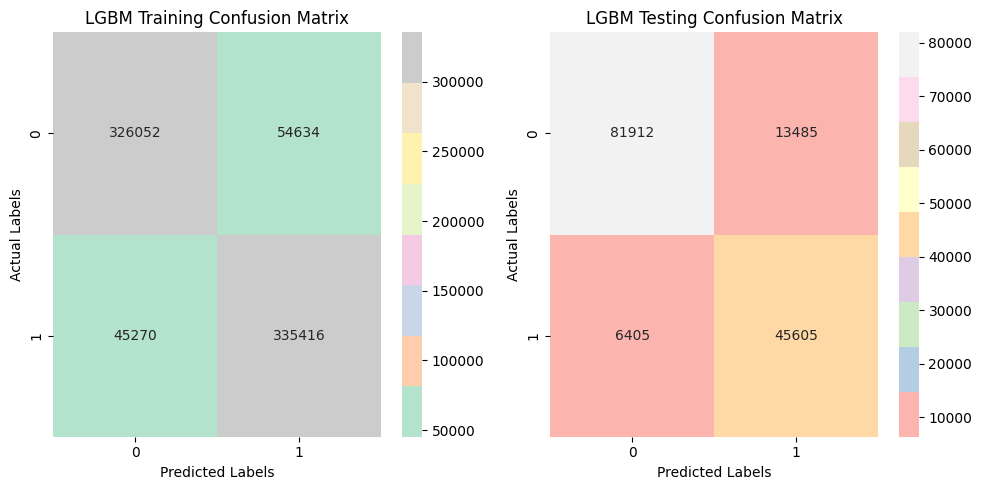

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.8703784434618339
Test F1 Score is: 0.8209720972097209
------------------------------------------------------------------------------------------------------
LGBM Training Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87    380686
           1       0.86      0.88      0.87    380686

    accuracy                           0.87    761372
   macro avg       0.87      0.87      0.87    761372
weighted avg       0.87      0.87      0.87    761372

------------------------------------------------------------------------------------------------------
LGBM Testing Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89     95397
           1       0.77      0.88      0.82     52010

    accuracy                           0.87    14740

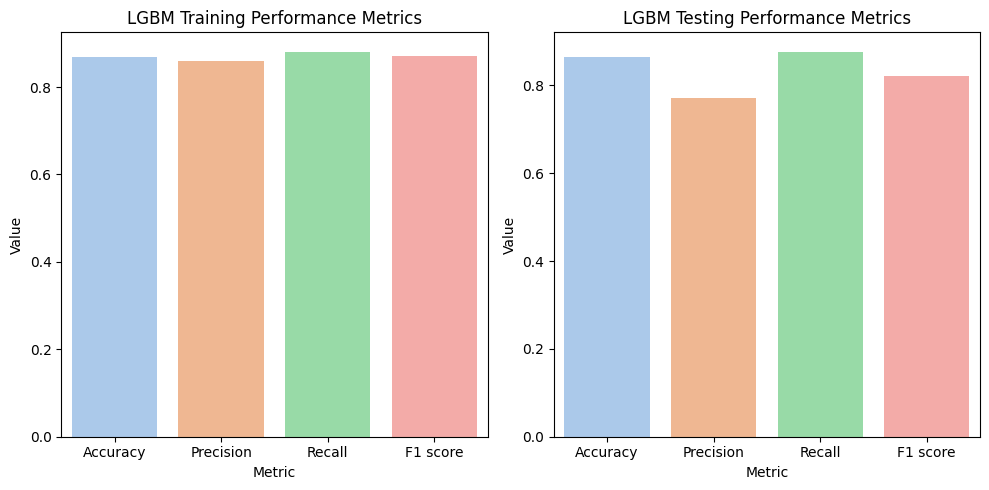

Stochastic Gradient Descent SGD
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for Stochastic Gradient Descent SGD :
 [0.72699572 0.75447214 0.78966862 0.80344642 0.74683794 0.68723485
 0.7774538  0.82661518 0.79883631 0.82426416]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


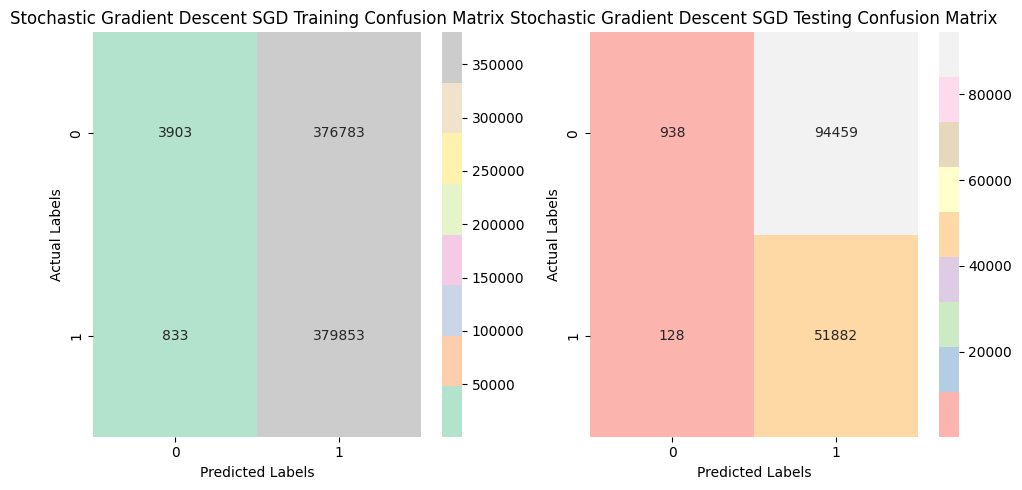

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.6679779341294725
Test F1 Score is: 0.5231332335102923
------------------------------------------------------------------------------------------------------
Stochastic Gradient Descent SGD Training Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.01      0.02    380686
           1       0.50      1.00      0.67    380686

    accuracy                           0.50    761372
   macro avg       0.66      0.50      0.34    761372
weighted avg       0.66      0.50      0.34    761372

------------------------------------------------------------------------------------------------------
Stochastic Gradient Descent SGD Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.01      0.02     95397
           1       0.35      1.00      0.52     52010

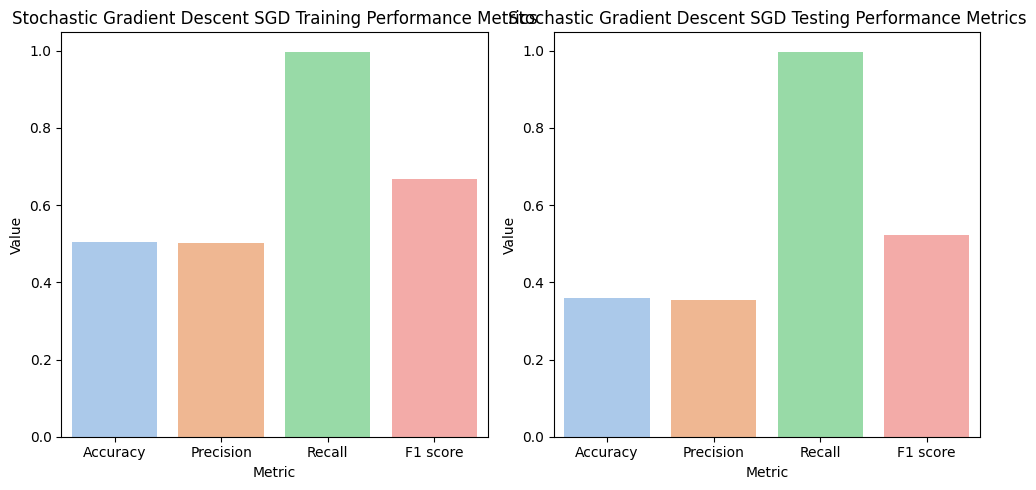

Gaussian Naive Bayes
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for Gaussian Naive Bayes :
 [0.72560351 0.72731094 0.72888346 0.72768825 0.72739929 0.71984712
 0.71283344 0.7141206  0.71422567 0.71486925]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


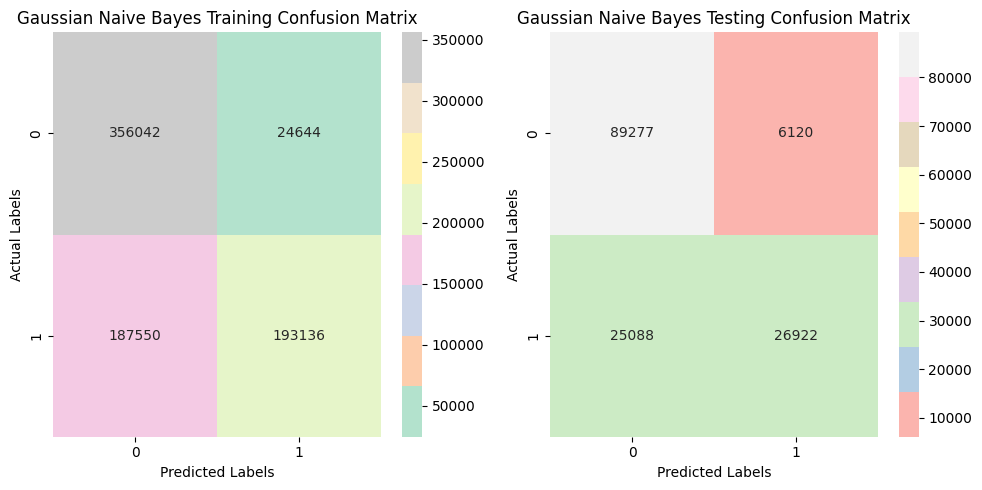

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.645436833504326
Test F1 Score is: 0.6330715327094013
------------------------------------------------------------------------------------------------------
Gaussian Naive Bayes Training Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.94      0.77    380686
           1       0.89      0.51      0.65    380686

    accuracy                           0.72    761372
   macro avg       0.77      0.72      0.71    761372
weighted avg       0.77      0.72      0.71    761372

------------------------------------------------------------------------------------------------------
Gaussian Naive Bayes Testing Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85     95397
           1       0.81      0.52      0.63     52010

    accuracy         

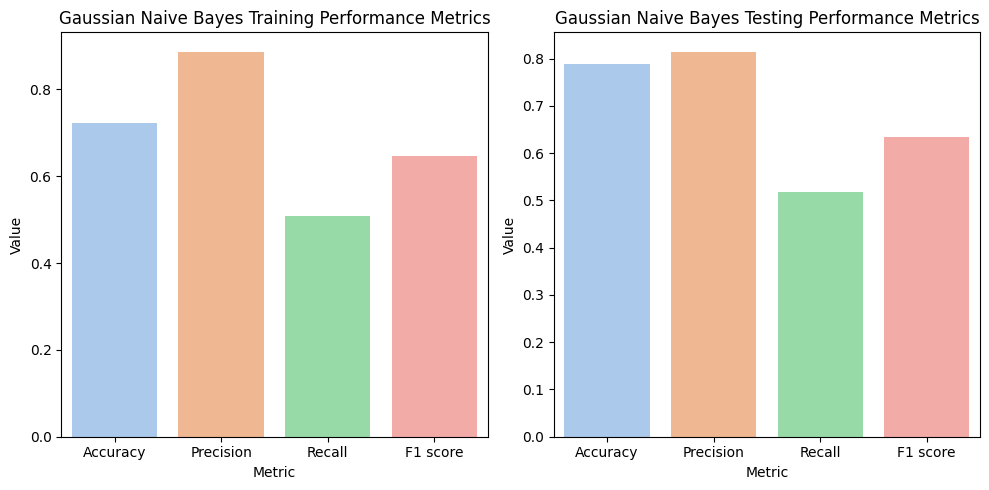

Bernoulli Naive Bayes
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for Bernoulli Naive Bayes :
 [0.78830545 0.78951378 0.78918266 0.78811879 0.7903122  0.78341674
 0.77933199 0.78139407 0.78442807 0.78314092]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


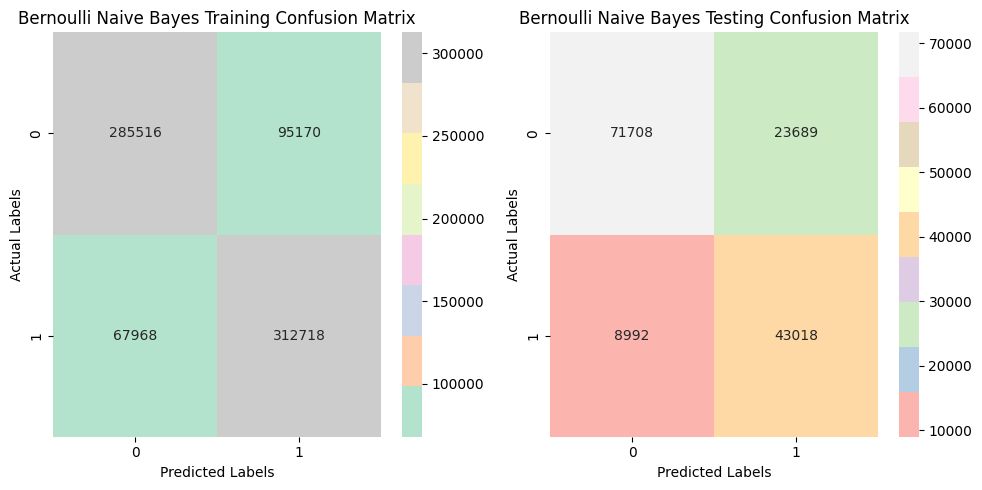

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.7931227760489187
Test F1 Score is: 0.7247150787166118
------------------------------------------------------------------------------------------------------
Bernoulli Naive Bayes Training Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78    380686
           1       0.77      0.82      0.79    380686

    accuracy                           0.79    761372
   macro avg       0.79      0.79      0.79    761372
weighted avg       0.79      0.79      0.79    761372

------------------------------------------------------------------------------------------------------
Bernoulli Naive Bayes Testing Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81     95397
           1       0.64      0.83      0.72     52010

    accuracy      

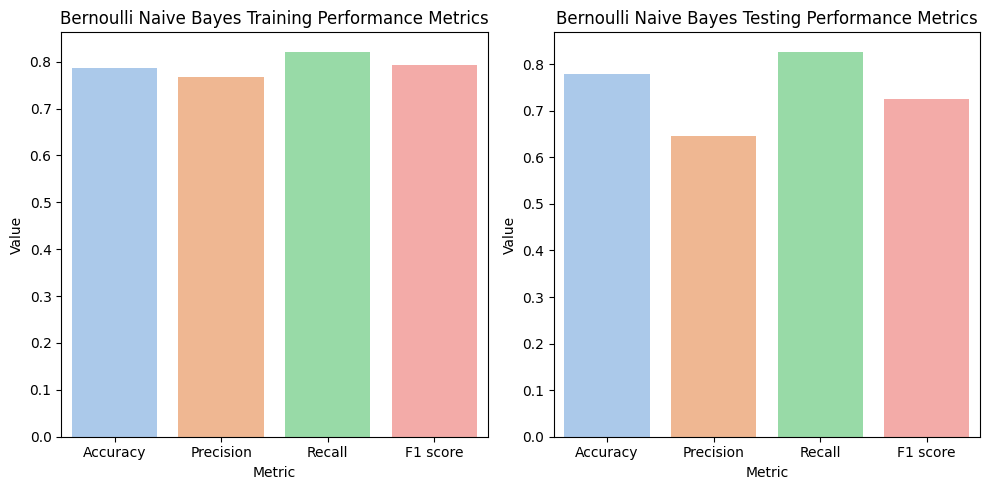

Extra Trees Classifier
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for Extra Trees Classifier :
 [0.77029867 0.77469857 0.77024311 0.771504   0.77288309 0.82035016
 0.86863155 0.86836886 0.86919632 0.86948527]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


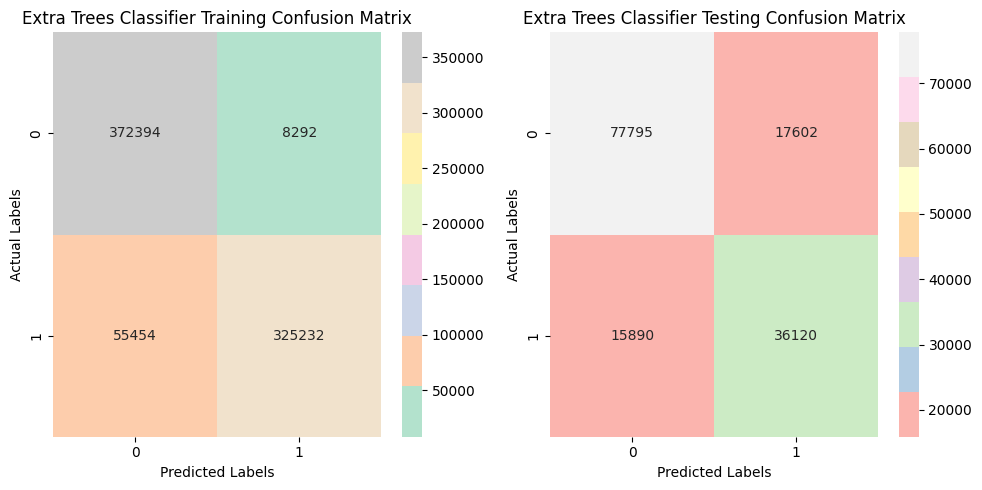

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.9107461390907435
Test F1 Score is: 0.6832368630121438
------------------------------------------------------------------------------------------------------
Extra Trees Classifier Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    380686
           1       0.98      0.85      0.91    380686

    accuracy                           0.92    761372
   macro avg       0.92      0.92      0.92    761372
weighted avg       0.92      0.92      0.92    761372

------------------------------------------------------------------------------------------------------
Extra Trees Classifier Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     95397
           1       0.67      0.69      0.68     52010

    accuracy    

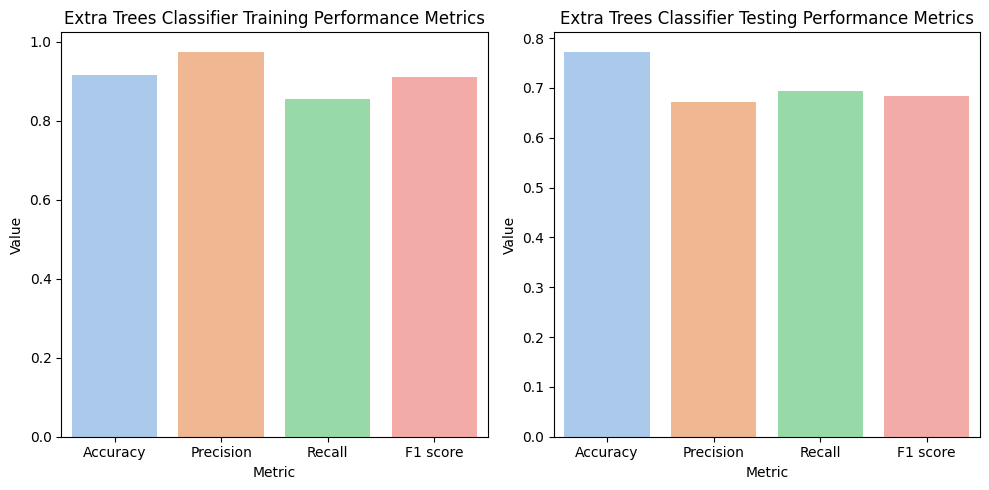

Extra Tree Classifier
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for Extra Tree Classifier :
 [0.75976516 0.76152513 0.75906589 0.76137752 0.76161393 0.79060115
 0.81614721 0.81735556 0.81688272 0.82029762]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


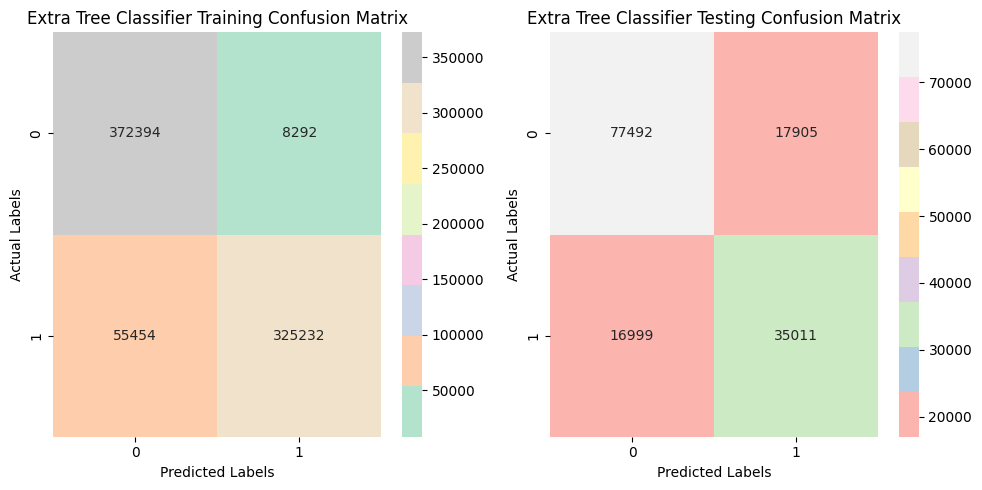

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.9107461390907435
Test F1 Score is: 0.6673465108743305
------------------------------------------------------------------------------------------------------
Extra Tree Classifier Training Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    380686
           1       0.98      0.85      0.91    380686

    accuracy                           0.92    761372
   macro avg       0.92      0.92      0.92    761372
weighted avg       0.92      0.92      0.92    761372

------------------------------------------------------------------------------------------------------
Extra Tree Classifier Testing Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     95397
           1       0.66      0.67      0.67     52010

    accuracy      

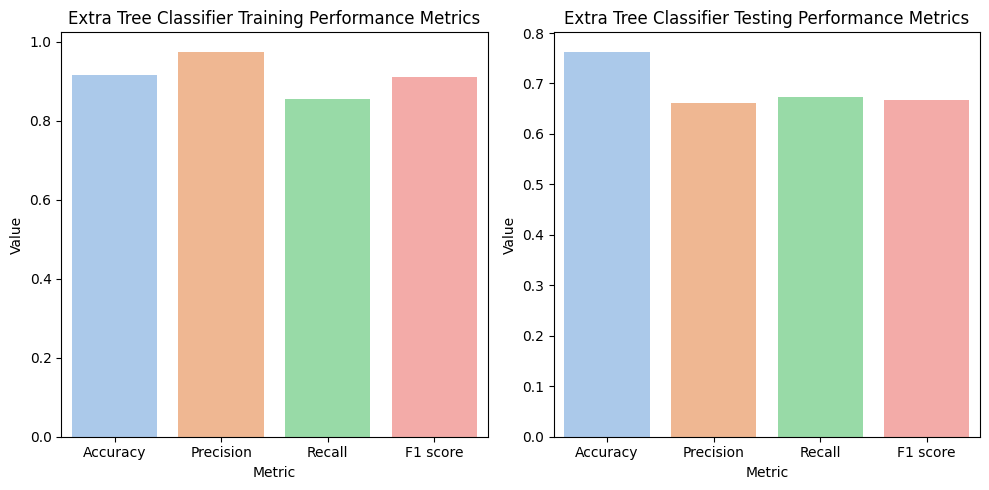

Bagging Classifier
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for Bagging Classifier :
 [0.77192729 0.77523707 0.77063714 0.77137266 0.77319831 0.82157164
 0.86939333 0.86957721 0.87019452 0.87140287]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


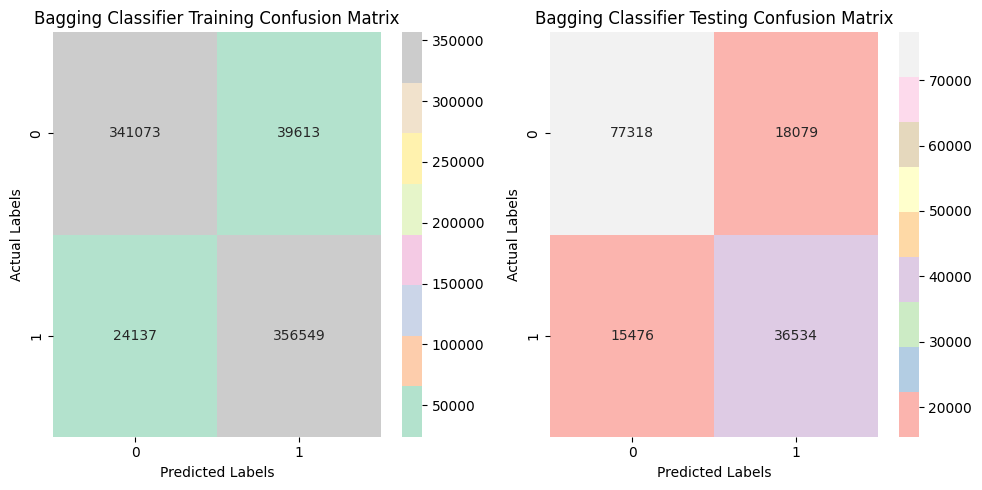

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.9179376145655264
Test F1 Score is: 0.685293041839003
------------------------------------------------------------------------------------------------------
Bagging Classifier Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91    380686
           1       0.90      0.94      0.92    380686

    accuracy                           0.92    761372
   macro avg       0.92      0.92      0.92    761372
weighted avg       0.92      0.92      0.92    761372

------------------------------------------------------------------------------------------------------
Bagging Classifier Testing Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     95397
           1       0.67      0.70      0.69     52010

    accuracy             

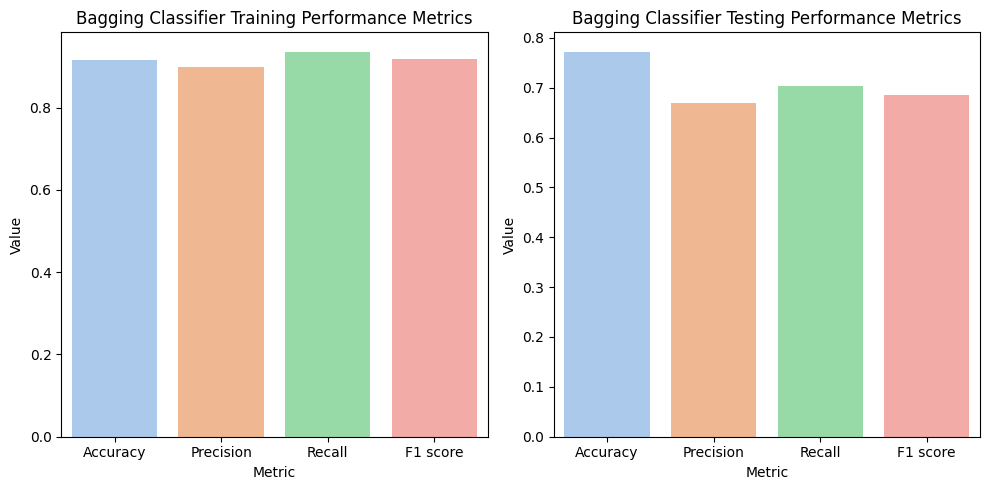

K Nearest Neighbors
------------------------------------------------------------------------------------------------------
Cross_validation Accuracy for K Nearest Neighbors :
 [0.82885025 0.82973023 0.82908441 0.82723249 0.82829636 0.84391295
 0.85884655 0.8604752  0.86165728 0.86307577]
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------


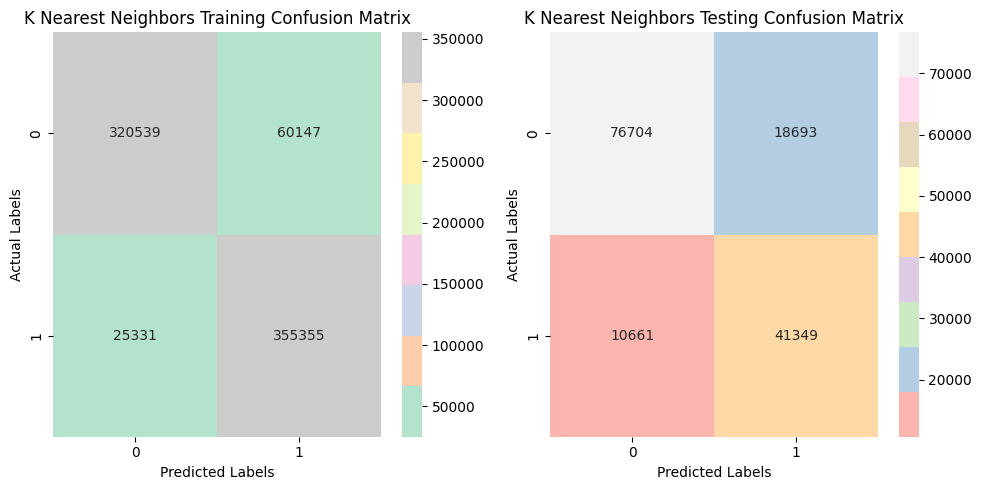

------------------------------------------------------------------------------------------------------
Train F1 Score is: 0.8926409340507517
Test F1 Score is: 0.7380323421268696
------------------------------------------------------------------------------------------------------
K Nearest Neighbors Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88    380686
           1       0.86      0.93      0.89    380686

    accuracy                           0.89    761372
   macro avg       0.89      0.89      0.89    761372
weighted avg       0.89      0.89      0.89    761372

------------------------------------------------------------------------------------------------------
K Nearest Neighbors Testing Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     95397
           1       0.69      0.80      0.74     52010

    accuracy          

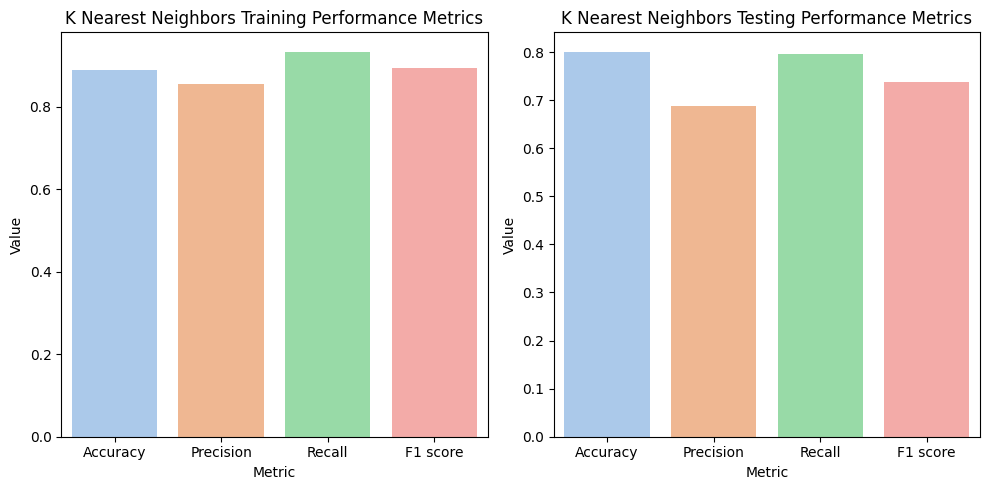

In [ ]:
# Assuming you have your data loaded into X_train, y_train, X_test, and y_test
models,classifiers = Classifiers(X_train_resampled, y_train_resampled, X_test, y_test)

#6. Apply Stacking Classifier and Soft Voting and compare the results with the champion model as a new approach in this project.

#### Calculate the TP , TN and F1_score(average='macro') for all models  

In [ ]:
models_results={}
models_predictions={}
for clf_name, clf in models.items():


    y_test_pred = clf.predict(X_test)
    f1_test = f1_score(y_test, y_test_pred, average='macro')
    ##############################################################################################################
    # Confusion Matrix for Training and Testing
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    models_results[clf_name] = {'TP': tp, 'TN': tn, 'f1': f1_test, 'y_test_pred': y_test_pred}
    models_predictions[clf_name] = {'y_test_pred': y_test_pred}
    print(f"{clf_name} Results:\n", models_results[clf_name])
    print("------------------------------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------------------------------")

Logistic Regression Results:
 {'TP': 38567, 'TN': 82322, 'f1': 0.8027215614231051, 'y_test_pred': array([1, 1, 0, ..., 1, 0, 0], dtype=int64)}
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Decision Tree Classifier Results:
 {'TP': 35121, 'TN': 77714, 'f1': 0.744100335933428, 'y_test_pred': array([1, 1, 0, ..., 0, 0, 0], dtype=int64)}
------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------
Random Forest Results:
 {'TP': 36563, 'TN': 77349, 'f1': 0.753933850804531, 'y_test_pred': array([1, 1, 0, ..., 0, 0, 0], dtype=int64)}
------------------------------------------------------------------------------------------------------
-----------------------------------------------------------

#### Find the Champion Model

In [3]:
# Display the champion model based on F1 score
sorted_results_f1 = sorted(models_results.items(), key=lambda x: x[1]['f1'], reverse=True)
champion_model, champion_metrics = sorted_results_f1[0]

# Create a DataFrame for the champion model
df_champion = pd.DataFrame({'Model': [champion_model], 'F1_Score': [champion_metrics['f1']]})

# Display the DataFrame
print("\nChampion Model based on F1_Score:")
# print(df_champion)
df_champion


Champion Model based on F1_Score:


,Model,F1_Score
0,LGBM,0.85


#### Sort the Models Results in Descending Order Based on TP

In [ ]:
# Display the results in descending order based on tp_test
sorted_results_tp = sorted(models_results.items(), key=lambda x: x[1]['TP'], reverse=True)

# Create a DataFrame from the results
df_tp = pd.DataFrame(sorted_results_tp, columns=['Model', 'Models Results in Descending Order based on TP'])

# If you want to add styling, you can use the following:
styled_table_tp = df_tp.style.background_gradient(cmap='Blues')
# display(styled_table_tp)
styled_table_tp

,Model,Models Results in Descending Order based on TP
0,Stochastic Gradient Descent SGD,"{'TP': 51882, 'TN': 938, 'f1': 0.2712905523573978}"
1,XGB Extreme X Gradient Boosting,"{'TP': 45651, 'TN': 81582, 'f1': 0.8544955559867369}"
2,LGBM,"{'TP': 45605, 'TN': 81912, 'f1': 0.8563529939655842}"
3,Catboost,"{'TP': 45594, 'TN': 81441, 'f1': 0.8531108199786871}"
4,Gradient Boosting,"{'TP': 43836, 'TN': 82828, 'f1': 0.8486938005436107}"
5,Bernoulli Naive Bayes,"{'TP': 43018, 'TN': 71708, 'f1': 0.7695649307391925}"
6,AdaBoost,"{'TP': 42638, 'TN': 82203, 'f1': 0.8350287807100614}"
7,K Nearest Neighbors,"{'TP': 41349, 'TN': 76704, 'f1': 0.7887095427709013}"
8,Logistic Regression,"{'TP': 38567, 'TN': 82322, 'f1': 0.8027215614231051}"
9,Random Forest,"{'TP': 36563, 'TN': 77349, 'f1': 0.753933850804531}"


#### Sort the Models Results in Descending Order Based on TN

In [ ]:
# Assuming models_results is a dictionary where each entry is {model_name: {'TN': value, ...}}
sorted_results_tn = sorted(models_results.items(), key=lambda x: x[1]['TN'], reverse=True)

# Create a DataFrame from the results
df_tn = pd.DataFrame(sorted_results_tn, columns=['Model', 'Models Results in Descending Order based on TN'])

# If you want to add styling, you can use the following:
styled_table_tn = df_tn.style.background_gradient(cmap='Blues')
# display(styled_table_tn)
styled_table_tn

,Model,Models Results in Descending Order based on TN
0,Gaussian Naive Bayes,"{'TP': 26922, 'TN': 89277, 'f1': 0.7421466968378196}"
1,Gradient Boosting,"{'TP': 43836, 'TN': 82828, 'f1': 0.8486938005436107}"
2,Logistic Regression,"{'TP': 38567, 'TN': 82322, 'f1': 0.8027215614231051}"
3,AdaBoost,"{'TP': 42638, 'TN': 82203, 'f1': 0.8350287807100614}"
4,LGBM,"{'TP': 45605, 'TN': 81912, 'f1': 0.8563529939655842}"
5,XGB Extreme X Gradient Boosting,"{'TP': 45651, 'TN': 81582, 'f1': 0.8544955559867369}"
6,Catboost,"{'TP': 45594, 'TN': 81441, 'f1': 0.8531108199786871}"
7,Extra Trees Classifier,"{'TP': 36120, 'TN': 77795, 'f1': 0.7530536818207502}"
8,Decision Tree Classifier,"{'TP': 35121, 'TN': 77714, 'f1': 0.744100335933428}"
9,Extra Tree Classifier,"{'TP': 35011, 'TN': 77492, 'f1': 0.7417664472133702}"


#### Sort the Models Results in Descending Order Based on F1_Score

In [ ]:
# Display the results in descending order based on f1 score
sorted_results_f1 = sorted(models_results.items(), key=lambda x: x[1]['f1'], reverse=True)

# Create a DataFrame from the results
df_f1 = pd.DataFrame(sorted_results_f1, columns=['Model', 'Models Results in Descending Order based on F1_Score'])

# If you want to add styling, you can use the following:
styled_table_f1 = df_f1.style.background_gradient(cmap='Blues')
# display(styled_table_f1)
styled_table_f1

,Model,Models Results in Descending Order based on F1_Score
0,LGBM,"{'TP': 45605, 'TN': 81912, 'f1': 0.8563529939655842}"
1,XGB Extreme X Gradient Boosting,"{'TP': 45651, 'TN': 81582, 'f1': 0.8544955559867369}"
2,Catboost,"{'TP': 45594, 'TN': 81441, 'f1': 0.8531108199786871}"
3,Gradient Boosting,"{'TP': 43836, 'TN': 82828, 'f1': 0.8486938005436107}"
4,AdaBoost,"{'TP': 42638, 'TN': 82203, 'f1': 0.8350287807100614}"
5,Logistic Regression,"{'TP': 38567, 'TN': 82322, 'f1': 0.8027215614231051}"
6,K Nearest Neighbors,"{'TP': 41349, 'TN': 76704, 'f1': 0.7887095427709013}"
7,Bernoulli Naive Bayes,"{'TP': 43018, 'TN': 71708, 'f1': 0.7695649307391925}"
8,Random Forest,"{'TP': 36563, 'TN': 77349, 'f1': 0.753933850804531}"
9,Bagging Classifier,"{'TP': 36534, 'TN': 77318, 'f1': 0.7534950737195822}"


#### Select the best two models in TP

In [ ]:
top_models_tp = sorted_results_tp[:5]
# Create a DataFrame from the results
df_tp = pd.DataFrame(top_models_tp, columns=['Model', 'Sort by Tp_Score'])
styled_table_tp = df_tp.style.background_gradient(cmap='Blues')
# display(styled_table_tp)
styled_table_tp

,Model,Sort by Tp_Score
0,Stochastic Gradient Descent SGD,"{'TP': 51882, 'TN': 938, 'f1': 0.2712905523573978}"
1,XGB Extreme X Gradient Boosting,"{'TP': 45651, 'TN': 81582, 'f1': 0.8544955559867369}"
2,LGBM,"{'TP': 45605, 'TN': 81912, 'f1': 0.8563529939655842}"
3,Catboost,"{'TP': 45594, 'TN': 81441, 'f1': 0.8531108199786871}"
4,Gradient Boosting,"{'TP': 43836, 'TN': 82828, 'f1': 0.8486938005436107}"


#### Select the best two models in TN

In [ ]:
top_models_tn = sorted_results_tn[:5]
# Create a DataFrame from the results
df_tn = pd.DataFrame(top_models_tn, columns=['Model', 'Sort by Tn_Score'])
styled_table_tn = df_tn.style.background_gradient(cmap='Blues')
# display(styled_table_tn)
styled_table_tn

,Model,Sort by Tn_Score
0,Gaussian Naive Bayes,"{'TP': 26922, 'TN': 89277, 'f1': 0.7421466968378196}"
1,Gradient Boosting,"{'TP': 43836, 'TN': 82828, 'f1': 0.8486938005436107}"
2,Logistic Regression,"{'TP': 38567, 'TN': 82322, 'f1': 0.8027215614231051}"
3,AdaBoost,"{'TP': 42638, 'TN': 82203, 'f1': 0.8350287807100614}"
4,LGBM,"{'TP': 45605, 'TN': 81912, 'f1': 0.8563529939655842}"


#### Select the best two models in F1_Score

In [ ]:
top_models_f1 = sorted_results_f1[:5]
# Create a DataFrame from the results
df_f1 = pd.DataFrame(top_models_f1, columns=['Model', 'Sort by F1_Score'])
styled_table_f1 = df_f1.style.background_gradient(cmap='Blues')
# display(styled_table_f1)
styled_table_f1

,Model,Sort by F1_Score
0,LGBM,"{'TP': 45605, 'TN': 81912, 'f1': 0.8563529939655842}"
1,XGB Extreme X Gradient Boosting,"{'TP': 45651, 'TN': 81582, 'f1': 0.8544955559867369}"
2,Catboost,"{'TP': 45594, 'TN': 81441, 'f1': 0.8531108199786871}"
3,Gradient Boosting,"{'TP': 43836, 'TN': 82828, 'f1': 0.8486938005436107}"
4,AdaBoost,"{'TP': 42638, 'TN': 82203, 'f1': 0.8350287807100614}"


# 7.Apply Fusion Classifier

#### Apply Stacking Classifier on the best two models in TP

In [ ]:
# Initialize the base models
base_models = [
    # ("Stochastic Gradient Descent SGD", SGDClassifier(loss='modified_huber', random_state=42)),
    ("XGB Extreme X Gradient Boosting", XGBClassifier(use_label_encoder=False)),
    ("LGBM", LGBMClassifier(random_state=42)),
]

#Initialize the stacking classifier with the meta-model
stacking_classifier1 = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(random_state=42)
)

# Fit the stacking classifier on the training data
stacking_classifier1.fit(X_train_resampled, y_train_resampled)

#### Apply Stacking Classifier on the best two models in TN

In [ ]:
# Initialize the base models
base_models = [
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("Gaussian Naive Bayes", GaussianNB())
    # ("Bagging Classifier", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)),
]

#Initialize the stacking classifier with the meta-model
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(random_state=42)
)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train_resampled, y_train_resampled)

#### Apply soft voting to the results of the Stacking Classifier for both TP and TN.

In [ ]:
# Create the ensemble model using soft voting
ensemble_classifier = VotingClassifier(estimators=[
    ("tn", stacking_classifier),
    ("tp", stacking_classifier1),
], voting='soft')

# Fit the ensemble model on the training data
ensemble_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation data
y_pred_ensemble = ensemble_classifier.predict(X_test)

In [1]:
f1_test = f1_score(y_test, y_pred_ensemble, average='macro')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_ensemble).ravel()
print(f"f1:{f1_test}")

f1:0.8910403711123118


#### Compare the results.

##### As shown here, the results of soft voting after selecting best of TP and TN are better than the champion model.

In [3]:
# Create a DataFrame for the ensemble classifier
df_ensemble = pd.DataFrame({'Model': ['Ensemble Classifier'], 'F1_Score': [f1_test]})

# Display the DataFrame for the ensemble classifier
print("\nEnsemble Classifier based on F1_Score:")
print(df_ensemble)

# Compare the results in a single DataFrame
df_comparison = pd.concat([df_champion, df_ensemble], ignore_index=True)

# Display the comparison DataFrame
print("\nComparison of Champion Model and Ensemble Classifier:")
# print(df_comparison)
df_comparison


Ensemble Classifier based on F1_Score:
                 Model  F1_Score
0  Ensemble Classifier      0.89

Comparison of Champion Model and Ensemble Classifier:


,Model,F1_Score
0,LGBM,0.85
1,Ensemble Classifier,0.89
